## Sign Language Recognition using CNNs

---



### Installing relevant libraries and downloading dataset:

In [2]:
!pip install kaggle

In [3]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download datamunge/sign-language-mnist

 78% 49.0M/62.6M [00:00<00:00, 64.9MB/s]
100% 62.6M/62.6M [00:00<00:00, 80.3MB/s]


In [5]:
!unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


### Importing required libraries

In [6]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras
from keras.utils import plot_model

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [7]:
# Loading the dataset
train_df = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')

# Shuffling the dataset
train_df = train_df.sample(frac=1, random_state=42)

In [8]:
# Splitting the dataset into X and y
X, y = train_df.drop('label', axis=1), train_df['label']
X.shape, y.shape

((27455, 784), (27455,))

In [9]:
# Binarizing labels in a one-vs-all fashion (return one-hot encoded vectors)
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

# Normalizing the training data and converting the data type to float
X = X/255.0

# Converting the 1-D array of 784 pixels to (28, 28, 1) Image
# (28, 28) represents the spatial dimensions of the image & 1 specifies that the image is grayscale
X = tf.reshape(X, [-1, 28, 28, 1])

X.shape, y.shape

(TensorShape([27455, 28, 28, 1]), (27455, 24))

In [10]:
# Generating a validation set

X_train, X_valid = X[:25000], X[25000:]
y_train, y_valid = y[:25000], y[25000:]

X_train[0].shape

TensorShape([28, 28, 1])

(<matplotlib.image.AxesImage at 0x7977f592a9b0>,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1]))

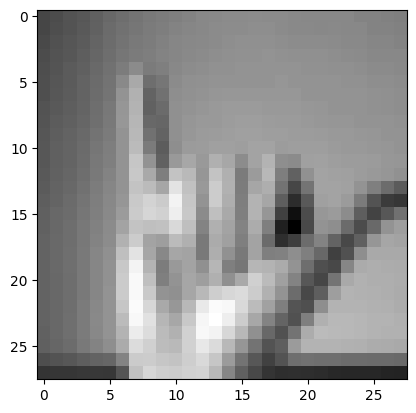

In [11]:
plt.imshow(X[0], cmap='gray'), y[0]

In [12]:
# Defining the CNN

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# Saves the best model so far
save_best_cb = keras.callbacks.ModelCheckpoint('initial-end-to-end', save_best_only=True)

# Interupts training when there is no progress
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

In [16]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid),
                    callbacks=[save_best_cb, early_stopping_cb])

Epoch 1/50
782/782 [==============================] - ETA: 0s - loss: 0.7134 - accuracy: 0.7811

782/782 [==============================] - 20s 9ms/step - loss: 0.7134 - accuracy: 0.7811 - val_loss: 0.0568 - val_accuracy: 0.9862
Epoch 2/50
777/782 [============================>.] - ETA: 0s - loss: 0.0180 - accuracy: 0.9950

782/782 [==============================] - 5s 6ms/step - loss: 0.0179 - accuracy: 0.9950 - val_loss: 6.1548e-04 - val_accuracy: 1.0000
Epoch 3/50
781/782 [============================>.] - ETA: 0s - loss: 2.6535e-04 - accuracy: 1.0000

782/782 [==============================] - 5s 7ms/step - loss: 2.6534e-04 - accuracy: 1.0000 - val_loss: 1.7835e-04 - val_accuracy: 1.0000
Epoch 4/50
774/782 [============================>.] - ETA: 0s - loss: 1.1158e-04 - accuracy: 1.0000

782/782 [==============================] - 6s 7ms/step - loss: 1.1117e-04 - accuracy: 1.0000 - val_loss: 1.0046e-04 - val_accuracy: 1.0000
Epoch 5/50
778/782 [============================>.] - ETA: 0s - loss: 6.2418e-05 - accuracy: 1.0000

782/782 [==============================] - 5s 6ms/step - loss: 6.2329e-05 - accuracy: 1.0000 - val_loss: 5.8533e-05 - val_accuracy: 1.0000
Epoch 6/50
780/782 [============================>.] - ETA: 0s - loss: 3.7691e-05 - accuracy: 1.0000

782/782 [==============================] - 6s 8ms/step - loss: 3.7747e-05 - accuracy: 1.0000 - val_loss: 3.6679e-05 - val_accuracy: 1.0000
Epoch 7/50
781/782 [============================>.] - ETA: 0s - loss: 2.4296e-05 - accuracy: 1.0000

782/782 [==============================] - 5s 7ms/step - loss: 2.4290e-05 - accuracy: 1.0000 - val_loss: 2.3508e-05 - val_accuracy: 1.0000
Epoch 8/50
780/782 [============================>.] - ETA: 0s - loss: 1.5467e-05 - accuracy: 1.0000

782/782 [==============================] - 6s 7ms/step - loss: 1.5457e-05 - accuracy: 1.0000 - val_loss: 1.5125e-05 - val_accuracy: 1.0000
Epoch 9/50
774/782 [============================>.] - ETA: 0s - loss: 9.9509e-06 - accuracy: 1.0000

782/782 [==============================] - 6s 7ms/step - loss: 9.9147e-06 - accuracy: 1.0000 - val_loss: 9.7503e-06 - val_accuracy: 1.0000
Epoch 10/50
781/782 [============================>.] - ETA: 0s - loss: 6.5356e-06 - accuracy: 1.0000

782/782 [==============================] - 6s 7ms/step - loss: 6.5337e-06 - accuracy: 1.0000 - val_loss: 6.5264e-06 - val_accuracy: 1.0000
Epoch 11/50
780/782 [============================>.] - ETA: 0s - loss: 4.3502e-06 - accuracy: 1.0000

782/782 [==============================] - 6s 8ms/step - loss: 4.3540e-06 - accuracy: 1.0000 - val_loss: 4.2519e-06 - val_accuracy: 1.0000
Epoch 12/50
779/782 [============================>.] - ETA: 0s - loss: 2.6996e-06 - accuracy: 1.0000

782/782 [==============================] - 5s 7ms/step - loss: 2.7092e-06 - accuracy: 1.0000 - val_loss: 2.7786e-06 - val_accuracy: 1.0000
Epoch 13/50
776/782 [============================>.] - ETA: 0s - loss: 1.7636e-06 - accuracy: 1.0000

782/782 [==============================] - 6s 7ms/step - loss: 1.7594e-06 - accuracy: 1.0000 - val_loss: 1.9482e-06 - val_accuracy: 1.0000
Epoch 14/50
773/782 [============================>.] - ETA: 0s - loss: 1.1572e-06 - accuracy: 1.0000

782/782 [==============================] - 5s 7ms/step - loss: 1.1535e-06 - accuracy: 1.0000 - val_loss: 1.1954e-06 - val_accuracy: 1.0000
Epoch 15/50
773/782 [============================>.] - ETA: 0s - loss: 7.6615e-07 - accuracy: 1.0000

782/782 [==============================] - 5s 6ms/step - loss: 7.6329e-07 - accuracy: 1.0000 - val_loss: 7.8604e-07 - val_accuracy: 1.0000
Epoch 16/50
772/782 [============================>.] - ETA: 0s - loss: 4.7138e-07 - accuracy: 1.0000

782/782 [==============================] - 6s 8ms/step - loss: 4.7145e-07 - accuracy: 1.0000 - val_loss: 5.3122e-07 - val_accuracy: 1.0000
Epoch 17/50
780/782 [============================>.] - ETA: 0s - loss: 3.1891e-07 - accuracy: 1.0000

782/782 [==============================] - 5s 7ms/step - loss: 3.1882e-07 - accuracy: 1.0000 - val_loss: 3.7462e-07 - val_accuracy: 1.0000
Epoch 18/50
780/782 [============================>.] - ETA: 0s - loss: 2.0958e-07 - accuracy: 1.0000

782/782 [==============================] - 6s 7ms/step - loss: 2.0956e-07 - accuracy: 1.0000 - val_loss: 2.7619e-07 - val_accuracy: 1.0000
Epoch 19/50
771/782 [============================>.] - ETA: 0s - loss: 1.2680e-07 - accuracy: 1.0000

782/782 [==============================] - 5s 7ms/step - loss: 1.2616e-07 - accuracy: 1.0000 - val_loss: 1.4708e-07 - val_accuracy: 1.0000
Epoch 20/50
781/782 [============================>.] - ETA: 0s - loss: 8.7551e-08 - accuracy: 1.0000

782/782 [==============================] - 5s 6ms/step - loss: 8.7733e-08 - accuracy: 1.0000 - val_loss: 1.1901e-07 - val_accuracy: 1.0000
Epoch 21/50
778/782 [============================>.] - ETA: 0s - loss: 6.4556e-08 - accuracy: 1.0000

782/782 [==============================] - 6s 8ms/step - loss: 6.4568e-08 - accuracy: 1.0000 - val_loss: 8.2257e-08 - val_accuracy: 1.0000
Epoch 22/50
782/782 [==============================] - ETA: 0s - loss: 4.1218e-08 - accuracy: 1.0000

782/782 [==============================] - 5s 7ms/step - loss: 4.1218e-08 - accuracy: 1.0000 - val_loss: 4.7004e-08 - val_accuracy: 1.0000
Epoch 23/50
775/782 [============================>.] - ETA: 0s - loss: 2.6130e-08 - accuracy: 1.0000

782/782 [==============================] - 6s 7ms/step - loss: 2.6193e-08 - accuracy: 1.0000 - val_loss: 4.6955e-08 - val_accuracy: 1.0000
Epoch 24/50
782/782 [==============================] - 4s 6ms/step - loss: 0.0810 - accuracy: 0.9799 - val_loss: 0.1503 - val_accuracy: 0.9393
Epoch 25/50
782/782 [==============================] - 4s 5ms/step - loss: 0.0149 - accuracy: 0.9964 - val_loss: 4.1312e-04 - val_accuracy: 1.0000
Epoch 26/50
782/782 [==============================] - 4s 6ms/step - loss: 2.1736e-04 - accuracy: 1.0000 - val_loss: 1.3556e-04 - val_accuracy: 1.0000
Epoch 27/50
782/782 [==============================] - 5s 6ms/step - loss: 8.2328e-05 - accuracy: 1.0000 - val_loss: 5.9990e-05 - val_accuracy: 1.0000
Epoch 28/50
782/782 [==============================] - 4s 5ms/step - loss: 4.1727e-05 - accuracy: 1.0000 - val_loss: 4.5296e-05 - val_accuracy: 1.0000


In [17]:
history.history

{'loss': [0.7134003043174744,
  0.017949476838111877,
  0.0002653408737387508,
  0.00011116564564872533,
  6.232856685528532e-05,
  3.7746802263427526e-05,
  2.4290156943607144e-05,
  1.5456917026313022e-05,
  9.914674592437223e-06,
  6.533706709888065e-06,
  4.354002157924697e-06,
  2.709197360672988e-06,
  1.7593977190699661e-06,
  1.1535130397533067e-06,
  7.63290984195919e-07,
  4.7145181270025205e-07,
  3.1881717177384417e-07,
  2.0956002799721318e-07,
  1.2616150968369766e-07,
  8.773321269472945e-08,
  6.456846790570125e-08,
  4.1217781188152e-08,
  2.6192662261337318e-08,
  0.0810176283121109,
  0.014859394170343876,
  0.00021736005146522075,
  8.232846448663622e-05,
  4.1727180359885097e-05],
 'accuracy': [0.7810800075531006,
  0.9950399994850159,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9799200296401978,
  0.9963600039482117,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.0568

In [18]:
best_model = keras.models.load_model('initial-end-to-end')

In [19]:
# Saving the history object
with open('intial-end-to-end-history', 'wb') as history_file:
    pickle.dump(history.history, history_file)

In [20]:
h = np.load('intial-end-to-end-history', allow_pickle=True)
h

{'loss': [0.7134003043174744,
  0.017949476838111877,
  0.0002653408737387508,
  0.00011116564564872533,
  6.232856685528532e-05,
  3.7746802263427526e-05,
  2.4290156943607144e-05,
  1.5456917026313022e-05,
  9.914674592437223e-06,
  6.533706709888065e-06,
  4.354002157924697e-06,
  2.709197360672988e-06,
  1.7593977190699661e-06,
  1.1535130397533067e-06,
  7.63290984195919e-07,
  4.7145181270025205e-07,
  3.1881717177384417e-07,
  2.0956002799721318e-07,
  1.2616150968369766e-07,
  8.773321269472945e-08,
  6.456846790570125e-08,
  4.1217781188152e-08,
  2.6192662261337318e-08,
  0.0810176283121109,
  0.014859394170343876,
  0.00021736005146522075,
  8.232846448663622e-05,
  4.1727180359885097e-05],
 'accuracy': [0.7810800075531006,
  0.9950399994850159,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9799200296401978,
  0.9963600039482117,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.0568

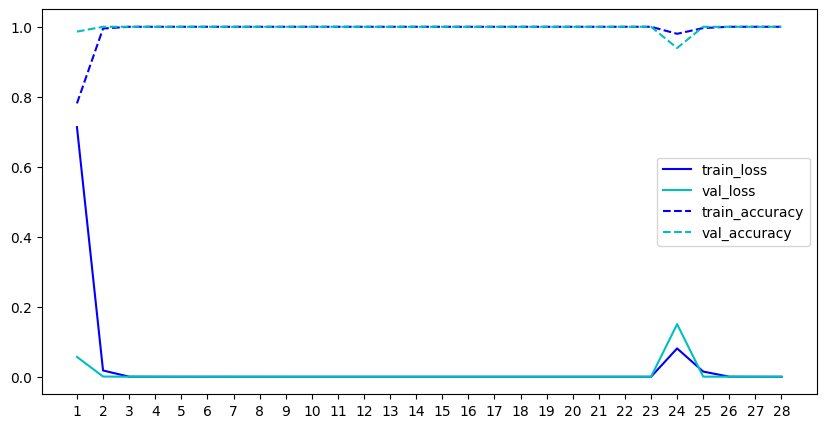

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])
ax.plot(range(1, n_epochs+1), h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='c', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='c', label='val_accuracy', linestyle='--')
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

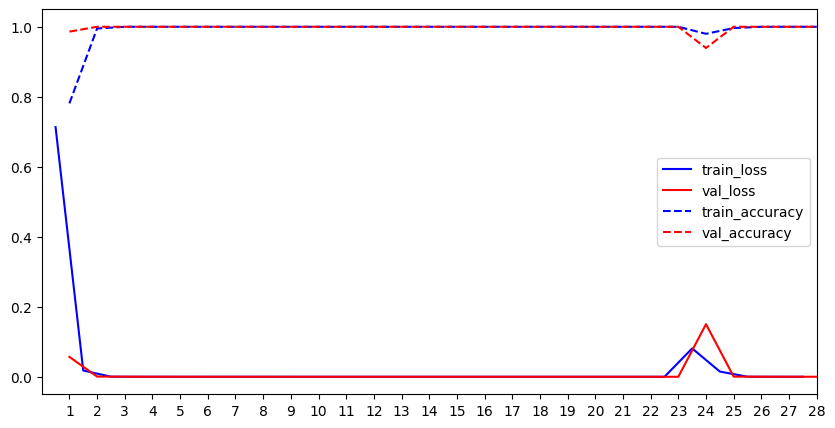

In [22]:
# Training Loss Correction

fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])

# Shift training loss by 0.5 as training loss is measured during the epoch and validation loss is measured after the epoch

x_loss = np.arange(n_epochs+1)-0.5
ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
ax.set_xlim(0, n_epochs)
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

In [23]:
# Defining a function the get the training and validation plots representing the accuracy and loss at each epoch

def get_train_val_plots(h, yticks=None, figsize=(10, 5)):
    # h: Any dictionary like the history.history

    fig, ax = plt.subplots(figsize=figsize)
    n_epochs = len(h['loss'])
    x_loss = np.arange(n_epochs+1)-0.5

    ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
    ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
    ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
    ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
    ax.set_xlim(0, n_epochs)
    ax.set_xticks(range(1, n_epochs+1))
    if yticks is not None:
        ax.set_yticks(yticks)
    ax.legend()

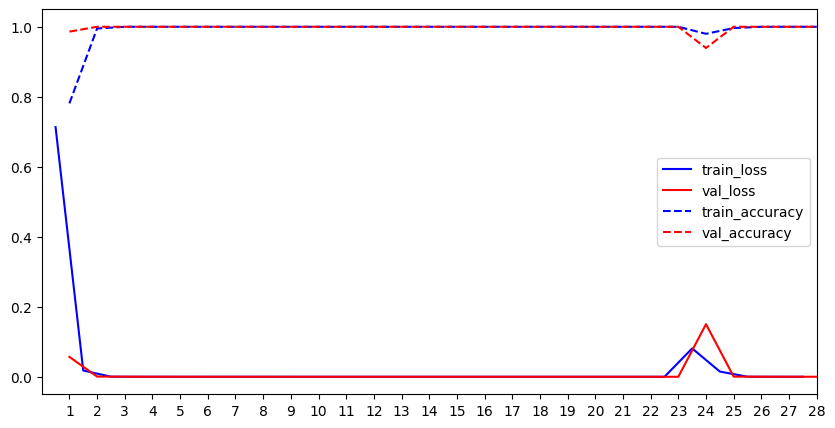

In [24]:
get_train_val_plots(h)

In [25]:
# Load the test data
test_df = pd.read_csv('sign_mnist_test.csv')

X_test, y_test = test_df.drop('label', axis=1), test_df['label']

X_test = tf.reshape(X_test, [-1, 28, 28, 1])

y_test = label_binarizer.transform(y_test)

best_model.evaluate(X_test, y_test)

225/225 [==============================] - 1s 4ms/step - loss: 113.9277 - accuracy: 0.9335


[113.92768096923828, 0.9334913492202759]

In [26]:
# Preprocesses the input and evaluates the model

def evaluate_model(model, X_test, y_test, label_binarizer):
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    y_test_labels = label_binarizer.transform(y_test)
    results = model.evaluate(X_test_reshape, y_test_labels)
    print(f'Loss: {results[0]:.3f} Accuracy: {results[1]:.3f}')

In [27]:
results = evaluate_model(best_model, test_df.drop('label', axis=1), test_df['label'], label_binarizer)

225/225 [==============================] - 1s 3ms/step - loss: 113.9277 - accuracy: 0.9335
Loss: 113.928 Accuracy: 0.933


In [28]:
 # Load the test data
test_df = pd.read_csv('sign_mnist_test.csv')

X_test, y_test = test_df.drop('label', axis=1), test_df['label']

X_test = tf.reshape(X_test, [-1, 28, 28, 1])

d = {chr(ord('a') + i):i for i in range(26)}
d_rev = {i:chr(ord('a') + i) for i in range(26)}
d[' '] = d_rev[' '] = ' '

sentence = 'sign language'

for i in sentence:
    print(d[i], end=' ')



18 8 6 13   11 0 13 6 20 0 6 4 

In [29]:
best_model.predict(tf.reshape(X_test[0], [-1, 28, 28, 1]))

1/1 [==============================] - 0s 273ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
images_taken = []
result = ''

for i in sentence:
    if i != ' ':
        char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
        images_taken.append(char_index)
        y_pred = best_model.predict(tf.reshape(X_test[char_index], [-1, 28, 28, 1]))
        result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
    else:
        result += ' '
print(result)

1/1 [==============================] - 0s 103ms/step
sign language


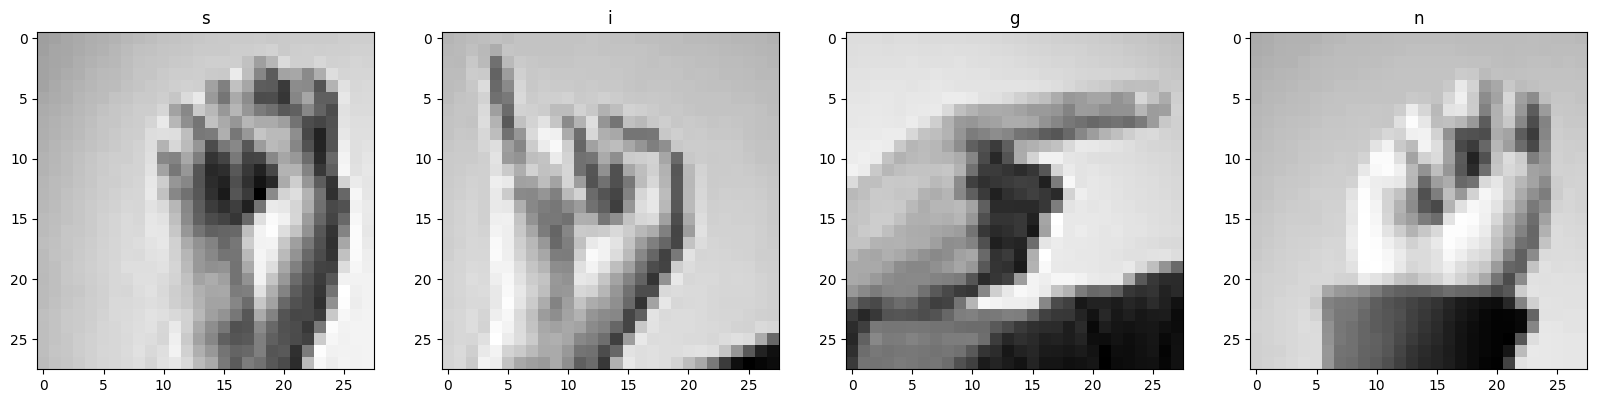

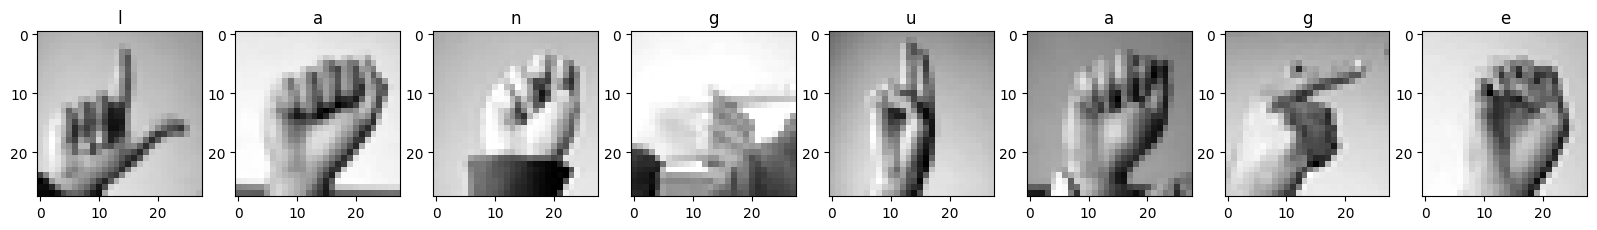

In [31]:
# Visualizing the test images
images_taken_dup = list(reversed(images_taken))
for word in sentence.split():
    fig, ax = plt.subplots(1, len(word), figsize=(20, 20))
    for i in range(len(word)):
        ax[i].imshow(X_test[images_taken_dup.pop()], cmap='gray')
        ax[i].set_title(word[i])

In [32]:
def test_on_sentence(model, sentence, X_test, y_test, label_binarizer, figsize=(20, 20)):
    # Random images are taken from X_test along with the corresponding labels in y_test
    # based on the letters in the sentence.
    # These images are fed to the model and its output is printed

    sentence = sentence.lower()

    d = {chr(ord('a') + i):i for i in range(26)}
    d_rev = {i:chr(ord('a') + i) for i in range(26)}
    d[' '] = d_rev[' '] = ' '


    images_taken = []
    result = ''

    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])


    for i in sentence:
        if i != ' ':
            char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
            images_taken.append(char_index)
            y_pred = model.predict(tf.reshape(X_test_reshape[char_index], [1, 28, 28, 1]))
            result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
        else:
            result += ' '

    print(f'The actual sentence is "{sentence}"')
    print(f'The predicted sentence is "{result}"')

    images_taken.reverse()
    for word in sentence.split():
        fig, ax = plt.subplots(1, len(word), figsize=figsize)
        for i in range(len(word)):
            ax[i].imshow(X_test_reshape[images_taken.pop()], cmap='gray')
            ax[i].set_title(word[i])



1/1 [==============================] - 0s 46ms/step
The actual sentence is "sign language"
The predicted sentence is "sign language"


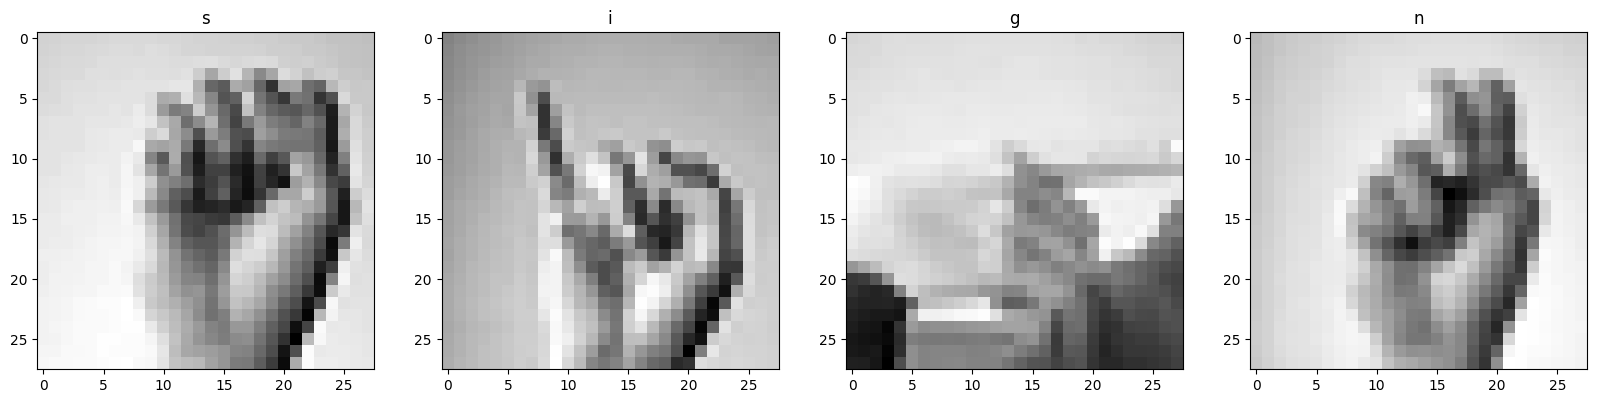

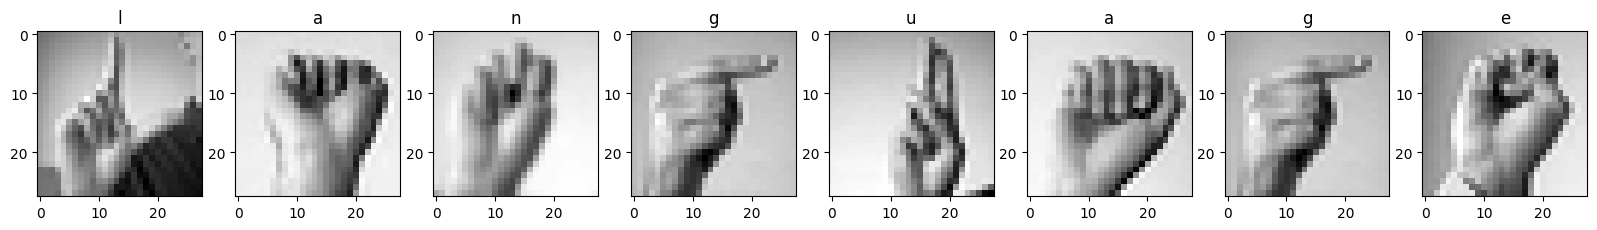

In [33]:
test_on_sentence(best_model, 'sign language', test_df.drop('label', axis=1), test_df['label'], label_binarizer)


## Hyperparameter Tuning

    -Convolution and Max Pooling Pairs
    -Filters in the convolution layers
    -Filter Shape
    -Dropout

####Convolution and Max Pooling Pairs

Before flattening

    -For pair = 1 -> Output to the dense layer will be of the shape (None, 14, 14, 32)
    -For pair = 2 -> Output to the dense layer will be of the shape (None, 7, 7, 64)
    -For pair = 3 -> Output to the dense layer will be of the shape (None, 3, 3, 96)
    -For pair = 4 -> Output to the dense layer will be of the shape (None, 1, 1, 128)


In [34]:
X_train, X_valid = X[:19500], X[19500:]
y_train, y_valid = y[:19500], y[19500:]

In [36]:
# Models
# 'models/experiment-1-1'
# 'models/experiment-1-2'
# 'models/experiment-1-3'

# History objects
# 'models/experiment-1-1-history'
# 'models/experiment-1-2-history'
# 'models/experiment-1-3-history'

n_pairs = 3
models_pairs = [keras.models.Sequential() for i in range(n_pairs)]
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

for n in range(1, n_pairs+1):
    models_pairs[n-1].add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    for i in range(1, n):
        models_pairs[n-1].add(keras.layers.Conv2D(32*(i+1), (5, 5), padding='same', activation='relu'))
        models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    models_pairs[n-1].add(keras.layers.Flatten())
    models_pairs[n-1].add(keras.layers.Dense(128, activation='relu'))
    models_pairs[n-1].add(keras.layers.Dense(24, activation='softmax'))
    models_pairs[n-1].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-1-{n}', save_best_only=True)
    history = models_pairs[n-1].fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-1-{n}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/50
606/610 [============================>.] - ETA: 0s - loss: 1.4251 - accuracy: 0.5880

610/610 [==============================] - 6s 6ms/step - loss: 1.4195 - accuracy: 0.5898 - val_loss: 0.5417 - val_accuracy: 0.8421
Epoch 2/50
606/610 [============================>.] - ETA: 0s - loss: 0.2877 - accuracy: 0.9292

610/610 [==============================] - 5s 8ms/step - loss: 0.2872 - accuracy: 0.9293 - val_loss: 0.2233 - val_accuracy: 0.9295
Epoch 3/50
605/610 [============================>.] - ETA: 0s - loss: 0.0807 - accuracy: 0.9903

610/610 [==============================] - 3s 6ms/step - loss: 0.0805 - accuracy: 0.9904 - val_loss: 0.0405 - val_accuracy: 0.9995
Epoch 4/50
604/610 [============================>.] - ETA: 0s - loss: 0.0251 - accuracy: 0.9996

610/610 [==============================] - 3s 5ms/step - loss: 0.0251 - accuracy: 0.9996 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 5/50
605/610 [============================>.] - ETA: 0s - loss: 0.0109 - accuracy: 0.9999

610/610 [==============================] - 4s 7ms/step - loss: 0.0109 - accuracy: 0.9999 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 6/50
600/610 [============================>.] - ETA: 0s - loss: 0.0130 - accuracy: 0.9981

610/610 [==============================] - 4s 6ms/step - loss: 0.0128 - accuracy: 0.9981 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 7/50
609/610 [============================>.] - ETA: 0s - loss: 0.0032 - accuracy: 1.0000

610/610 [==============================] - 4s 6ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 8/50
603/610 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000

610/610 [==============================] - 3s 5ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 9/50
607/610 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

610/610 [==============================] - 4s 7ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 10/50
609/610 [============================>.] - ETA: 0s - loss: 8.1331e-04 - accuracy: 1.0000

610/610 [==============================] - 3s 6ms/step - loss: 8.1293e-04 - accuracy: 1.0000 - val_loss: 7.5252e-04 - val_accuracy: 1.0000
Epoch 11/50
610/610 [==============================] - 3s 5ms/step - loss: 5.8634e-04 - accuracy: 1.0000 - val_loss: 7.8089e-04 - val_accuracy: 1.0000
Epoch 12/50
602/610 [============================>.] - ETA: 0s - loss: 4.0504e-04 - accuracy: 1.0000

610/610 [==============================] - 4s 6ms/step - loss: 4.0424e-04 - accuracy: 1.0000 - val_loss: 3.5560e-04 - val_accuracy: 1.0000
Epoch 13/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0309 - accuracy: 0.9907 - val_loss: 0.0052 - val_accuracy: 0.9996
Epoch 14/50
610/610 [==============================] - 3s 4ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 6.8467e-04 - val_accuracy: 1.0000
Epoch 15/50
610/610 [==============================] - 3s 4ms/step - loss: 4.8923e-04 - accuracy: 1.0000 - val_loss: 4.2773e-04 - val_accuracy: 1.0000
Epoch 16/50
605/610 [============================>.] - ETA: 0s - loss: 3.3572e-04 - accuracy: 1.0000

610/610 [==============================] - 4s 6ms/step - loss: 3.3551e-04 - accuracy: 1.0000 - val_loss: 3.1747e-04 - val_accuracy: 1.0000
Epoch 17/50
609/610 [============================>.] - ETA: 0s - loss: 2.5428e-04 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 2.5429e-04 - accuracy: 1.0000 - val_loss: 2.4227e-04 - val_accuracy: 1.0000
Epoch 18/50
606/610 [============================>.] - ETA: 0s - loss: 1.9713e-04 - accuracy: 1.0000

610/610 [==============================] - 3s 5ms/step - loss: 1.9700e-04 - accuracy: 1.0000 - val_loss: 1.9443e-04 - val_accuracy: 1.0000
Epoch 19/50
607/610 [============================>.] - ETA: 0s - loss: 1.5890e-04 - accuracy: 1.0000

610/610 [==============================] - 3s 5ms/step - loss: 1.5872e-04 - accuracy: 1.0000 - val_loss: 1.5406e-04 - val_accuracy: 1.0000
Epoch 20/50
605/610 [============================>.] - ETA: 0s - loss: 1.2426e-04 - accuracy: 1.0000

610/610 [==============================] - 4s 6ms/step - loss: 1.2402e-04 - accuracy: 1.0000 - val_loss: 1.2293e-04 - val_accuracy: 1.0000
Epoch 21/50
598/610 [============================>.] - ETA: 0s - loss: 9.5524e-05 - accuracy: 1.0000

610/610 [==============================] - 4s 7ms/step - loss: 9.4771e-05 - accuracy: 1.0000 - val_loss: 1.0286e-04 - val_accuracy: 1.0000
Epoch 22/50
599/610 [============================>.] - ETA: 0s - loss: 8.1131e-05 - accuracy: 1.0000

610/610 [==============================] - 3s 6ms/step - loss: 8.0962e-05 - accuracy: 1.0000 - val_loss: 7.9336e-05 - val_accuracy: 1.0000
Epoch 23/50
601/610 [============================>.] - ETA: 0s - loss: 5.6962e-05 - accuracy: 1.0000

610/610 [==============================] - 4s 6ms/step - loss: 5.7035e-05 - accuracy: 1.0000 - val_loss: 5.4552e-05 - val_accuracy: 1.0000
Epoch 24/50
610/610 [==============================] - 4s 6ms/step - loss: 4.8486e-05 - accuracy: 1.0000 - val_loss: 7.6818e-05 - val_accuracy: 1.0000
Epoch 25/50
601/610 [============================>.] - ETA: 0s - loss: 3.2916e-05 - accuracy: 1.0000

610/610 [==============================] - 4s 6ms/step - loss: 3.2693e-05 - accuracy: 1.0000 - val_loss: 3.2294e-05 - val_accuracy: 1.0000
Epoch 26/50
609/610 [============================>.] - ETA: 0s - loss: 2.4414e-05 - accuracy: 1.0000

610/610 [==============================] - 4s 6ms/step - loss: 2.4403e-05 - accuracy: 1.0000 - val_loss: 2.9141e-05 - val_accuracy: 1.0000
Epoch 27/50
610/610 [==============================] - 3s 5ms/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 4.6255e-04 - val_accuracy: 1.0000
Epoch 28/50
610/610 [==============================] - 4s 6ms/step - loss: 1.9192e-04 - accuracy: 1.0000 - val_loss: 1.7162e-04 - val_accuracy: 1.0000
Epoch 29/50
610/610 [==============================] - 4s 7ms/step - loss: 1.0500e-04 - accuracy: 1.0000 - val_loss: 1.1293e-04 - val_accuracy: 1.0000
Epoch 30/50
610/610 [==============================] - 3s 4ms/step - loss: 7.6971e-05 - accuracy: 1.0000 - val_loss: 8.7879e-05 - val_accuracy: 1.0000
Epoch 31/50
610/610 [==============================] - 3s 5ms/step - loss: 6.0690e-05 - accuracy: 1.0000 - val_loss: 7.1995e-05 - val_accuracy: 1.0000
Epoch 1/50
610/610 [==============================] - ETA: 0s - loss: 0.9218 - accuracy: 0.7217

610/610 [==============================] - 7s 9ms/step - loss: 0.9218 - accuracy: 0.7217 - val_loss: 0.1624 - val_accuracy: 0.9485
Epoch 2/50
610/610 [==============================] - ETA: 0s - loss: 0.0315 - accuracy: 0.9942

610/610 [==============================] - 5s 9ms/step - loss: 0.0315 - accuracy: 0.9942 - val_loss: 0.0135 - val_accuracy: 0.9977
Epoch 3/50
608/610 [============================>.] - ETA: 0s - loss: 0.0095 - accuracy: 0.9984

610/610 [==============================] - 4s 7ms/step - loss: 0.0095 - accuracy: 0.9984 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/50
610/610 [==============================] - 3s 6ms/step - loss: 0.0166 - accuracy: 0.9956 - val_loss: 0.0244 - val_accuracy: 0.9935
Epoch 5/50
605/610 [============================>.] - ETA: 0s - loss: 0.0040 - accuracy: 0.9992

610/610 [==============================] - 10s 16ms/step - loss: 0.0039 - accuracy: 0.9992 - val_loss: 3.4596e-04 - val_accuracy: 1.0000
Epoch 6/50
609/610 [============================>.] - ETA: 0s - loss: 2.1123e-04 - accuracy: 1.0000

610/610 [==============================] - 7s 12ms/step - loss: 2.1115e-04 - accuracy: 1.0000 - val_loss: 1.8937e-04 - val_accuracy: 1.0000
Epoch 7/50
610/610 [==============================] - ETA: 0s - loss: 1.2425e-04 - accuracy: 1.0000

610/610 [==============================] - 7s 11ms/step - loss: 1.2425e-04 - accuracy: 1.0000 - val_loss: 1.1829e-04 - val_accuracy: 1.0000
Epoch 8/50
609/610 [============================>.] - ETA: 0s - loss: 8.2619e-05 - accuracy: 1.0000

610/610 [==============================] - 5s 9ms/step - loss: 8.2577e-05 - accuracy: 1.0000 - val_loss: 8.2798e-05 - val_accuracy: 1.0000
Epoch 9/50
607/610 [============================>.] - ETA: 0s - loss: 5.7786e-05 - accuracy: 1.0000

610/610 [==============================] - 7s 12ms/step - loss: 5.7885e-05 - accuracy: 1.0000 - val_loss: 6.2699e-05 - val_accuracy: 1.0000
Epoch 10/50
602/610 [============================>.] - ETA: 0s - loss: 4.1884e-05 - accuracy: 1.0000

610/610 [==============================] - 4s 7ms/step - loss: 4.1906e-05 - accuracy: 1.0000 - val_loss: 4.3870e-05 - val_accuracy: 1.0000
Epoch 11/50
608/610 [============================>.] - ETA: 0s - loss: 3.0276e-05 - accuracy: 1.0000

610/610 [==============================] - 7s 11ms/step - loss: 3.0242e-05 - accuracy: 1.0000 - val_loss: 3.2865e-05 - val_accuracy: 1.0000
Epoch 12/50
609/610 [============================>.] - ETA: 0s - loss: 2.2457e-05 - accuracy: 1.0000

610/610 [==============================] - 6s 10ms/step - loss: 2.2445e-05 - accuracy: 1.0000 - val_loss: 2.7279e-05 - val_accuracy: 1.0000
Epoch 13/50
610/610 [==============================] - 3s 5ms/step - loss: 0.0209 - accuracy: 0.9945 - val_loss: 0.1173 - val_accuracy: 0.9595
Epoch 14/50
610/610 [==============================] - 4s 7ms/step - loss: 0.0107 - accuracy: 0.9968 - val_loss: 2.0519e-04 - val_accuracy: 1.0000
Epoch 15/50
610/610 [==============================] - 6s 9ms/step - loss: 1.2715e-04 - accuracy: 1.0000 - val_loss: 9.8552e-05 - val_accuracy: 1.0000
Epoch 16/50
610/610 [==============================] - 4s 6ms/step - loss: 7.0071e-05 - accuracy: 1.0000 - val_loss: 6.1140e-05 - val_accuracy: 1.0000
Epoch 17/50
610/610 [==============================] - 4s 7ms/step - loss: 4.3913e-05 - accuracy: 1.0000 - val_loss: 3.9457e-05 - val_accuracy: 1.0000
Epoch 1/50
610/610 [==============================] - ETA: 0s - loss: 0.9454 - accuracy: 0.7059

610/610 [==============================] - 9s 10ms/step - loss: 0.9454 - accuracy: 0.7059 - val_loss: 0.1185 - val_accuracy: 0.9634
Epoch 2/50
604/610 [============================>.] - ETA: 0s - loss: 0.0301 - accuracy: 0.9933

610/610 [==============================] - 6s 11ms/step - loss: 0.0304 - accuracy: 0.9931 - val_loss: 0.0379 - val_accuracy: 0.9891
Epoch 3/50
603/610 [============================>.] - ETA: 0s - loss: 0.0266 - accuracy: 0.9913

610/610 [==============================] - 5s 9ms/step - loss: 0.0264 - accuracy: 0.9914 - val_loss: 8.6212e-04 - val_accuracy: 1.0000
Epoch 4/50
603/610 [============================>.] - ETA: 0s - loss: 3.7194e-04 - accuracy: 1.0000

610/610 [==============================] - 5s 9ms/step - loss: 3.7046e-04 - accuracy: 1.0000 - val_loss: 2.0196e-04 - val_accuracy: 1.0000
Epoch 5/50
605/610 [============================>.] - ETA: 0s - loss: 1.3965e-04 - accuracy: 1.0000

610/610 [==============================] - 6s 10ms/step - loss: 1.3943e-04 - accuracy: 1.0000 - val_loss: 1.1377e-04 - val_accuracy: 1.0000
Epoch 6/50
605/610 [============================>.] - ETA: 0s - loss: 8.0261e-05 - accuracy: 1.0000

610/610 [==============================] - 5s 9ms/step - loss: 8.0325e-05 - accuracy: 1.0000 - val_loss: 7.2186e-05 - val_accuracy: 1.0000
Epoch 7/50
603/610 [============================>.] - ETA: 0s - loss: 5.2270e-05 - accuracy: 1.0000

610/610 [==============================] - 7s 12ms/step - loss: 5.2196e-05 - accuracy: 1.0000 - val_loss: 4.8670e-05 - val_accuracy: 1.0000
Epoch 8/50
604/610 [============================>.] - ETA: 0s - loss: 3.5408e-05 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 3.5445e-05 - accuracy: 1.0000 - val_loss: 3.3013e-05 - val_accuracy: 1.0000
Epoch 9/50
610/610 [==============================] - ETA: 0s - loss: 2.5035e-05 - accuracy: 1.0000

610/610 [==============================] - 6s 10ms/step - loss: 2.5035e-05 - accuracy: 1.0000 - val_loss: 2.4383e-05 - val_accuracy: 1.0000
Epoch 10/50
602/610 [============================>.] - ETA: 0s - loss: 1.7674e-05 - accuracy: 1.0000

610/610 [==============================] - 6s 10ms/step - loss: 1.7781e-05 - accuracy: 1.0000 - val_loss: 1.8110e-05 - val_accuracy: 1.0000
Epoch 11/50
605/610 [============================>.] - ETA: 0s - loss: 1.2867e-05 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 1.2837e-05 - accuracy: 1.0000 - val_loss: 1.3139e-05 - val_accuracy: 1.0000
Epoch 12/50
607/610 [============================>.] - ETA: 0s - loss: 9.3769e-06 - accuracy: 1.0000

610/610 [==============================] - 6s 10ms/step - loss: 9.3540e-06 - accuracy: 1.0000 - val_loss: 1.0363e-05 - val_accuracy: 1.0000
Epoch 13/50
606/610 [============================>.] - ETA: 0s - loss: 6.7884e-06 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 6.7662e-06 - accuracy: 1.0000 - val_loss: 7.2389e-06 - val_accuracy: 1.0000
Epoch 14/50
603/610 [============================>.] - ETA: 0s - loss: 4.7881e-06 - accuracy: 1.0000

610/610 [==============================] - 6s 10ms/step - loss: 4.7890e-06 - accuracy: 1.0000 - val_loss: 5.2489e-06 - val_accuracy: 1.0000
Epoch 15/50
601/610 [============================>.] - ETA: 0s - loss: 3.4993e-06 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 3.5029e-06 - accuracy: 1.0000 - val_loss: 3.9533e-06 - val_accuracy: 1.0000
Epoch 16/50
607/610 [============================>.] - ETA: 0s - loss: 2.5356e-06 - accuracy: 1.0000

610/610 [==============================] - 6s 11ms/step - loss: 2.5290e-06 - accuracy: 1.0000 - val_loss: 3.1176e-06 - val_accuracy: 1.0000
Epoch 17/50
606/610 [============================>.] - ETA: 0s - loss: 1.8071e-06 - accuracy: 1.0000

610/610 [==============================] - 6s 10ms/step - loss: 1.8007e-06 - accuracy: 1.0000 - val_loss: 2.1459e-06 - val_accuracy: 1.0000
Epoch 18/50
602/610 [============================>.] - ETA: 0s - loss: 1.3023e-06 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 1.3028e-06 - accuracy: 1.0000 - val_loss: 1.7239e-06 - val_accuracy: 1.0000
Epoch 19/50
610/610 [==============================] - ETA: 0s - loss: 9.7287e-07 - accuracy: 1.0000

610/610 [==============================] - 6s 9ms/step - loss: 9.7287e-07 - accuracy: 1.0000 - val_loss: 1.3332e-06 - val_accuracy: 1.0000
Epoch 20/50
603/610 [============================>.] - ETA: 0s - loss: 6.8145e-07 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 6.7866e-07 - accuracy: 1.0000 - val_loss: 9.9759e-07 - val_accuracy: 1.0000
Epoch 21/50
601/610 [============================>.] - ETA: 0s - loss: 5.1033e-07 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 5.0852e-07 - accuracy: 1.0000 - val_loss: 7.0832e-07 - val_accuracy: 1.0000
Epoch 22/50
610/610 [==============================] - ETA: 0s - loss: 3.5426e-07 - accuracy: 1.0000

610/610 [==============================] - 6s 9ms/step - loss: 3.5426e-07 - accuracy: 1.0000 - val_loss: 4.9241e-07 - val_accuracy: 1.0000
Epoch 23/50
607/610 [============================>.] - ETA: 0s - loss: 2.6149e-07 - accuracy: 1.0000

610/610 [==============================] - 6s 9ms/step - loss: 2.6098e-07 - accuracy: 1.0000 - val_loss: 4.8147e-07 - val_accuracy: 1.0000
Epoch 24/50
608/610 [============================>.] - ETA: 0s - loss: 1.9538e-07 - accuracy: 1.0000

610/610 [==============================] - 8s 14ms/step - loss: 1.9522e-07 - accuracy: 1.0000 - val_loss: 3.3551e-07 - val_accuracy: 1.0000
Epoch 25/50
610/610 [==============================] - ETA: 0s - loss: 1.3286e-07 - accuracy: 1.0000

610/610 [==============================] - 8s 12ms/step - loss: 1.3286e-07 - accuracy: 1.0000 - val_loss: 2.4155e-07 - val_accuracy: 1.0000
Epoch 26/50
603/610 [============================>.] - ETA: 0s - loss: 9.7135e-08 - accuracy: 1.0000

610/610 [==============================] - 8s 13ms/step - loss: 9.6688e-08 - accuracy: 1.0000 - val_loss: 1.5720e-07 - val_accuracy: 1.0000
Epoch 27/50
603/610 [============================>.] - ETA: 0s - loss: 7.2529e-08 - accuracy: 1.0000

610/610 [==============================] - 6s 9ms/step - loss: 7.2406e-08 - accuracy: 1.0000 - val_loss: 1.2535e-07 - val_accuracy: 1.0000
Epoch 28/50
608/610 [============================>.] - ETA: 0s - loss: 5.2270e-08 - accuracy: 1.0000

610/610 [==============================] - 7s 11ms/step - loss: 5.2250e-08 - accuracy: 1.0000 - val_loss: 1.0275e-07 - val_accuracy: 1.0000
Epoch 29/50
607/610 [============================>.] - ETA: 0s - loss: 3.8431e-08 - accuracy: 1.0000

610/610 [==============================] - 5s 9ms/step - loss: 3.8343e-08 - accuracy: 1.0000 - val_loss: 7.3623e-08 - val_accuracy: 1.0000
Epoch 30/50
603/610 [============================>.] - ETA: 0s - loss: 2.7399e-08 - accuracy: 1.0000

610/610 [==============================] - 6s 10ms/step - loss: 2.7247e-08 - accuracy: 1.0000 - val_loss: 5.8982e-08 - val_accuracy: 1.0000
Epoch 31/50
610/610 [==============================] - 4s 7ms/step - loss: 2.1452e-08 - accuracy: 1.0000 - val_loss: 1.1501e-07 - val_accuracy: 1.0000
Epoch 32/50
610/610 [==============================] - 5s 9ms/step - loss: 0.0673 - accuracy: 0.9833 - val_loss: 3.1451e-04 - val_accuracy: 1.0000
Epoch 33/50
610/610 [==============================] - 5s 8ms/step - loss: 1.5093e-04 - accuracy: 1.0000 - val_loss: 1.0153e-04 - val_accuracy: 1.0000
Epoch 34/50
610/610 [==============================] - 4s 7ms/step - loss: 6.7584e-05 - accuracy: 1.0000 - val_loss: 6.1422e-05 - val_accuracy: 1.0000
Epoch 35/50
610/610 [==============================] - 4s 6ms/step - loss: 4.1858e-05 - accuracy: 1.0000 - val_loss: 3.9668e-05 - val_accuracy: 1.0000


In [37]:
models_pairs[0].summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               802944    
                                                                 
 dense_5 (Dense)             (None, 24)                3096      
                                                                 
Total params: 806,872
Trainable params: 806,872
Non-trainable params: 0
________________________________________________

In [38]:
models_pairs[1].summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [39]:
models_pairs[2].summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 96)          153696    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 3, 3, 96)        

In [40]:
for index in range(n_pairs):
    model = keras.models.load_model(f'models/experiment-1-{index+1}')
    model.evaluate(X_valid, y_valid)

249/249 [==============================] - 1s 4ms/step - loss: 5.8982e-08 - accuracy: 1.0000


In [41]:
h_1_1 = np.load('models/experiment-1-1-history', allow_pickle=True)
h_1_2 = np.load('models/experiment-1-2-history', allow_pickle=True)
h_1_3 = np.load('models/experiment-1-3-history', allow_pickle=True)

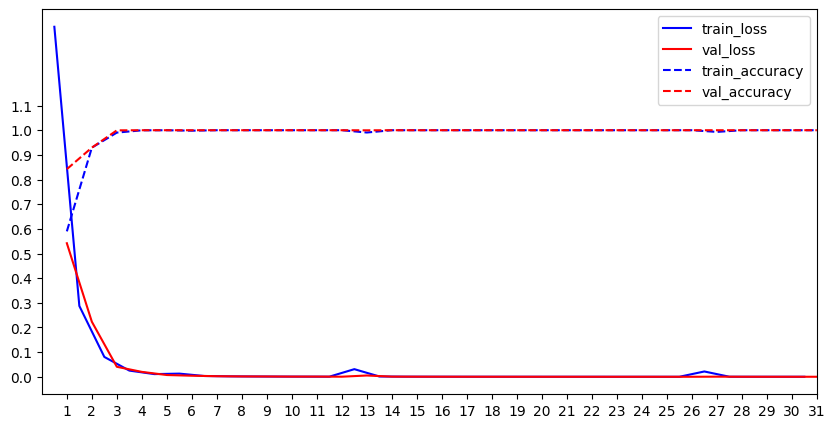

In [42]:
get_train_val_plots(h_1_1, yticks=np.arange(0, 1.2, 0.1))

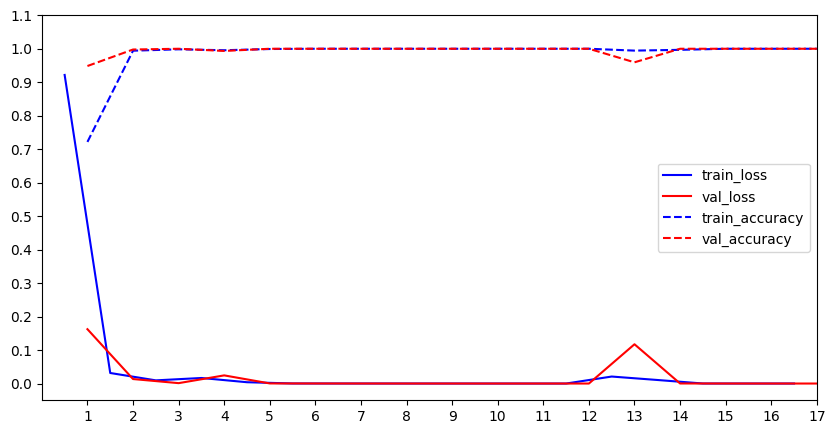

In [43]:
get_train_val_plots(h_1_2, yticks=np.arange(0, 1.2, 0.1))

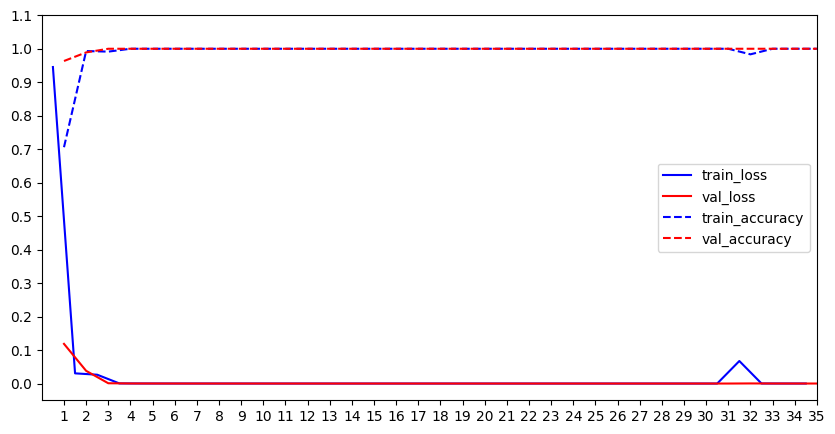

In [44]:
get_train_val_plots(h_1_3, yticks=np.arange(0, 1.2, 0.1))


###Filters

Our Models now contains 3 pairs of Convolution and Pooling layers

Number of filters maps can be

1.    8 - 16 - 32
2.    16 - 32 - 64
3.    24 - 48 - 96



In [46]:
# Models
# 'models/experiment-fmaps-1'
# 'models/experiment-fmaps-2'
# 'models/experiment-fmaps-3'

# History objects
# 'models/experiment-fmaps-1-history'
# 'models/experiment-fmaps-2-history'
# 'models/experiment-fmaps-3-history'

n_tests = 3

models = []
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)


for i in range(n_tests):
    model = keras.models.Sequential()
    models.append(model)
    model.add(keras.layers.Input(shape=(28, 28, 1)))
    for pairs in range(3):
        model.add(keras.layers.Conv2D((8*(i+1))*(2**pairs), (5, 5), padding='same', activation='relu'))
        model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(24, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-fmaps-{i+1}', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-fmaps-{i+1}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/50
610/610 [==============================] - ETA: 0s - loss: 1.1467 - accuracy: 0.6457

610/610 [==============================] - 10s 11ms/step - loss: 1.1467 - accuracy: 0.6457 - val_loss: 0.2056 - val_accuracy: 0.9516
Epoch 2/50
599/610 [============================>.] - ETA: 0s - loss: 0.1100 - accuracy: 0.9703

610/610 [==============================] - 50s 82ms/step - loss: 0.1093 - accuracy: 0.9704 - val_loss: 0.0623 - val_accuracy: 0.9809
Epoch 3/50
610/610 [==============================] - 3s 6ms/step - loss: 0.0307 - accuracy: 0.9927 - val_loss: 0.0732 - val_accuracy: 0.9779
Epoch 4/50
603/610 [============================>.] - ETA: 0s - loss: 0.0139 - accuracy: 0.9970

610/610 [==============================] - 4s 7ms/step - loss: 0.0138 - accuracy: 0.9970 - val_loss: 0.0131 - val_accuracy: 0.9970
Epoch 5/50
609/610 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9998

610/610 [==============================] - 6s 10ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 7.7213e-04 - val_accuracy: 1.0000
Epoch 6/50
602/610 [============================>.] - ETA: 0s - loss: 5.4885e-04 - accuracy: 1.0000

610/610 [==============================] - 4s 7ms/step - loss: 5.4724e-04 - accuracy: 1.0000 - val_loss: 5.0967e-04 - val_accuracy: 1.0000
Epoch 7/50
610/610 [==============================] - 3s 5ms/step - loss: 0.0519 - accuracy: 0.9839 - val_loss: 0.0424 - val_accuracy: 0.9876
Epoch 8/50
610/610 [==============================] - 4s 7ms/step - loss: 0.0158 - accuracy: 0.9955 - val_loss: 0.0122 - val_accuracy: 0.9971
Epoch 9/50
603/610 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9997

610/610 [==============================] - 4s 7ms/step - loss: 0.0023 - accuracy: 0.9997 - val_loss: 2.9608e-04 - val_accuracy: 1.0000
Epoch 10/50
602/610 [============================>.] - ETA: 0s - loss: 2.0017e-04 - accuracy: 1.0000

610/610 [==============================] - 4s 7ms/step - loss: 1.9875e-04 - accuracy: 1.0000 - val_loss: 1.7434e-04 - val_accuracy: 1.0000
Epoch 11/50
607/610 [============================>.] - ETA: 0s - loss: 1.1675e-04 - accuracy: 1.0000

610/610 [==============================] - 6s 9ms/step - loss: 1.1667e-04 - accuracy: 1.0000 - val_loss: 1.1312e-04 - val_accuracy: 1.0000
Epoch 12/50
606/610 [============================>.] - ETA: 0s - loss: 8.0362e-05 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 8.0146e-05 - accuracy: 1.0000 - val_loss: 8.3541e-05 - val_accuracy: 1.0000
Epoch 13/50
606/610 [============================>.] - ETA: 0s - loss: 5.4996e-05 - accuracy: 1.0000

610/610 [==============================] - 4s 7ms/step - loss: 5.4899e-05 - accuracy: 1.0000 - val_loss: 6.1934e-05 - val_accuracy: 1.0000
Epoch 14/50
609/610 [============================>.] - ETA: 0s - loss: 3.9877e-05 - accuracy: 1.0000

610/610 [==============================] - 5s 9ms/step - loss: 3.9862e-05 - accuracy: 1.0000 - val_loss: 4.5518e-05 - val_accuracy: 1.0000
Epoch 15/50
609/610 [============================>.] - ETA: 0s - loss: 2.9085e-05 - accuracy: 1.0000

610/610 [==============================] - 4s 7ms/step - loss: 2.9078e-05 - accuracy: 1.0000 - val_loss: 3.4490e-05 - val_accuracy: 1.0000
Epoch 16/50
603/610 [============================>.] - ETA: 0s - loss: 2.0842e-05 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 2.0933e-05 - accuracy: 1.0000 - val_loss: 2.7450e-05 - val_accuracy: 1.0000
Epoch 17/50
603/610 [============================>.] - ETA: 0s - loss: 1.5979e-05 - accuracy: 1.0000

610/610 [==============================] - 5s 9ms/step - loss: 1.5907e-05 - accuracy: 1.0000 - val_loss: 2.2187e-05 - val_accuracy: 1.0000
Epoch 18/50
606/610 [============================>.] - ETA: 0s - loss: 1.1538e-05 - accuracy: 1.0000

610/610 [==============================] - 4s 7ms/step - loss: 1.1495e-05 - accuracy: 1.0000 - val_loss: 2.1602e-05 - val_accuracy: 1.0000
Epoch 19/50
603/610 [============================>.] - ETA: 0s - loss: 8.4929e-06 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 8.4874e-06 - accuracy: 1.0000 - val_loss: 1.4443e-05 - val_accuracy: 1.0000
Epoch 20/50
603/610 [============================>.] - ETA: 0s - loss: 6.2161e-06 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 6.2579e-06 - accuracy: 1.0000 - val_loss: 1.1804e-05 - val_accuracy: 1.0000
Epoch 21/50
605/610 [============================>.] - ETA: 0s - loss: 4.4202e-06 - accuracy: 1.0000

610/610 [==============================] - 4s 7ms/step - loss: 4.4203e-06 - accuracy: 1.0000 - val_loss: 6.9720e-06 - val_accuracy: 1.0000
Epoch 22/50
605/610 [============================>.] - ETA: 0s - loss: 3.4120e-06 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 3.4179e-06 - accuracy: 1.0000 - val_loss: 6.6086e-06 - val_accuracy: 1.0000
Epoch 23/50
610/610 [==============================] - 4s 6ms/step - loss: 2.5292e-06 - accuracy: 1.0000 - val_loss: 8.1492e-06 - val_accuracy: 1.0000
Epoch 24/50
610/610 [==============================] - 3s 6ms/step - loss: 1.8852e-06 - accuracy: 1.0000 - val_loss: 6.8635e-06 - val_accuracy: 1.0000
Epoch 25/50
601/610 [============================>.] - ETA: 0s - loss: 1.3580e-06 - accuracy: 1.0000

610/610 [==============================] - 5s 7ms/step - loss: 1.3492e-06 - accuracy: 1.0000 - val_loss: 4.8388e-06 - val_accuracy: 1.0000
Epoch 26/50
603/610 [============================>.] - ETA: 0s - loss: 9.8596e-07 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 9.8681e-07 - accuracy: 1.0000 - val_loss: 3.6856e-06 - val_accuracy: 1.0000
Epoch 27/50
610/610 [==============================] - 3s 5ms/step - loss: 8.9764e-07 - accuracy: 1.0000 - val_loss: 5.2290e-06 - val_accuracy: 1.0000
Epoch 28/50
610/610 [==============================] - 3s 6ms/step - loss: 5.6073e-07 - accuracy: 1.0000 - val_loss: 4.6400e-06 - val_accuracy: 1.0000
Epoch 29/50
610/610 [==============================] - 4s 7ms/step - loss: 0.0489 - accuracy: 0.9859 - val_loss: 3.6148e-04 - val_accuracy: 1.0000
Epoch 30/50
610/610 [==============================] - 4s 6ms/step - loss: 2.0943e-04 - accuracy: 1.0000 - val_loss: 1.7970e-04 - val_accuracy: 1.0000
Epoch 31/50
610/610 [==============================] - 3s 5ms/step - loss: 9.3339e-05 - accuracy: 1.0000 - val_loss: 1.1687e-04 - val_accuracy: 1.0000
Epoch 1/50
610/610 [==============================] - ETA: 0s - loss: 1.0263 - accuracy: 0.6813

610/610 [==============================] - 8s 8ms/step - loss: 1.0263 - accuracy: 0.6813 - val_loss: 0.2075 - val_accuracy: 0.9300
Epoch 2/50
606/610 [============================>.] - ETA: 0s - loss: 0.0680 - accuracy: 0.9806

610/610 [==============================] - 4s 7ms/step - loss: 0.0677 - accuracy: 0.9807 - val_loss: 0.0160 - val_accuracy: 0.9967
Epoch 3/50
610/610 [==============================] - 5s 8ms/step - loss: 0.0282 - accuracy: 0.9917 - val_loss: 0.0260 - val_accuracy: 0.9936
Epoch 4/50
601/610 [============================>.] - ETA: 0s - loss: 0.0039 - accuracy: 0.9994

610/610 [==============================] - 4s 7ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 6.7913e-04 - val_accuracy: 1.0000
Epoch 5/50
601/610 [============================>.] - ETA: 0s - loss: 3.6716e-04 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 3.6500e-04 - accuracy: 1.0000 - val_loss: 2.9771e-04 - val_accuracy: 1.0000
Epoch 6/50
605/610 [============================>.] - ETA: 0s - loss: 1.9954e-04 - accuracy: 1.0000

610/610 [==============================] - 6s 10ms/step - loss: 1.9934e-04 - accuracy: 1.0000 - val_loss: 1.9136e-04 - val_accuracy: 1.0000
Epoch 7/50
604/610 [============================>.] - ETA: 0s - loss: 1.2545e-04 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 1.2585e-04 - accuracy: 1.0000 - val_loss: 1.2841e-04 - val_accuracy: 1.0000
Epoch 8/50
605/610 [============================>.] - ETA: 0s - loss: 8.5264e-05 - accuracy: 1.0000

610/610 [==============================] - 5s 9ms/step - loss: 8.5097e-05 - accuracy: 1.0000 - val_loss: 9.3844e-05 - val_accuracy: 1.0000
Epoch 9/50
603/610 [============================>.] - ETA: 0s - loss: 5.9382e-05 - accuracy: 1.0000

610/610 [==============================] - 6s 10ms/step - loss: 5.9222e-05 - accuracy: 1.0000 - val_loss: 6.5651e-05 - val_accuracy: 1.0000
Epoch 10/50
605/610 [============================>.] - ETA: 0s - loss: 4.1817e-05 - accuracy: 1.0000

610/610 [==============================] - 5s 7ms/step - loss: 4.1759e-05 - accuracy: 1.0000 - val_loss: 4.8039e-05 - val_accuracy: 1.0000
Epoch 11/50
604/610 [============================>.] - ETA: 0s - loss: 3.0172e-05 - accuracy: 1.0000

610/610 [==============================] - 6s 10ms/step - loss: 3.0160e-05 - accuracy: 1.0000 - val_loss: 3.5124e-05 - val_accuracy: 1.0000
Epoch 12/50
602/610 [============================>.] - ETA: 0s - loss: 2.1289e-05 - accuracy: 1.0000

610/610 [==============================] - 5s 7ms/step - loss: 2.1298e-05 - accuracy: 1.0000 - val_loss: 2.8604e-05 - val_accuracy: 1.0000
Epoch 13/50
610/610 [==============================] - ETA: 0s - loss: 1.5207e-05 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 1.5207e-05 - accuracy: 1.0000 - val_loss: 1.7818e-05 - val_accuracy: 1.0000
Epoch 14/50
602/610 [============================>.] - ETA: 0s - loss: 1.0709e-05 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 1.0697e-05 - accuracy: 1.0000 - val_loss: 1.3738e-05 - val_accuracy: 1.0000
Epoch 15/50
600/610 [============================>.] - ETA: 0s - loss: 7.7847e-06 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 7.7468e-06 - accuracy: 1.0000 - val_loss: 1.0041e-05 - val_accuracy: 1.0000
Epoch 16/50
610/610 [==============================] - ETA: 0s - loss: 5.3621e-06 - accuracy: 1.0000

610/610 [==============================] - 6s 9ms/step - loss: 5.3621e-06 - accuracy: 1.0000 - val_loss: 8.1291e-06 - val_accuracy: 1.0000
Epoch 17/50
606/610 [============================>.] - ETA: 0s - loss: 3.9109e-06 - accuracy: 1.0000

610/610 [==============================] - 5s 7ms/step - loss: 3.9015e-06 - accuracy: 1.0000 - val_loss: 5.5485e-06 - val_accuracy: 1.0000
Epoch 18/50
603/610 [============================>.] - ETA: 0s - loss: 2.7305e-06 - accuracy: 1.0000

610/610 [==============================] - 5s 7ms/step - loss: 2.7269e-06 - accuracy: 1.0000 - val_loss: 3.7789e-06 - val_accuracy: 1.0000
Epoch 19/50
606/610 [============================>.] - ETA: 0s - loss: 1.8532e-06 - accuracy: 1.0000

610/610 [==============================] - 6s 9ms/step - loss: 1.8539e-06 - accuracy: 1.0000 - val_loss: 2.6215e-06 - val_accuracy: 1.0000
Epoch 20/50
604/610 [============================>.] - ETA: 0s - loss: 1.3474e-06 - accuracy: 1.0000

610/610 [==============================] - 4s 7ms/step - loss: 1.3404e-06 - accuracy: 1.0000 - val_loss: 1.9898e-06 - val_accuracy: 1.0000
Epoch 21/50
600/610 [============================>.] - ETA: 0s - loss: 9.5939e-07 - accuracy: 1.0000

610/610 [==============================] - 5s 9ms/step - loss: 9.5396e-07 - accuracy: 1.0000 - val_loss: 1.7470e-06 - val_accuracy: 1.0000
Epoch 22/50
604/610 [============================>.] - ETA: 0s - loss: 6.8851e-07 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 6.8877e-07 - accuracy: 1.0000 - val_loss: 1.4565e-06 - val_accuracy: 1.0000
Epoch 23/50
606/610 [============================>.] - ETA: 0s - loss: 4.9606e-07 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 4.9597e-07 - accuracy: 1.0000 - val_loss: 1.1062e-06 - val_accuracy: 1.0000
Epoch 24/50
605/610 [============================>.] - ETA: 0s - loss: 3.6643e-07 - accuracy: 1.0000

610/610 [==============================] - 5s 9ms/step - loss: 3.6645e-07 - accuracy: 1.0000 - val_loss: 7.2164e-07 - val_accuracy: 1.0000
Epoch 25/50
602/610 [============================>.] - ETA: 0s - loss: 2.5019e-07 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 2.4897e-07 - accuracy: 1.0000 - val_loss: 5.2883e-07 - val_accuracy: 1.0000
Epoch 26/50
605/610 [============================>.] - ETA: 0s - loss: 1.8045e-07 - accuracy: 1.0000

610/610 [==============================] - 4s 7ms/step - loss: 1.7960e-07 - accuracy: 1.0000 - val_loss: 3.7325e-07 - val_accuracy: 1.0000
Epoch 27/50
610/610 [==============================] - 4s 7ms/step - loss: 0.0995 - accuracy: 0.9761 - val_loss: 0.0191 - val_accuracy: 0.9964
Epoch 28/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0078 - accuracy: 0.9981 - val_loss: 0.0230 - val_accuracy: 0.9925
Epoch 29/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 1.9945e-04 - val_accuracy: 1.0000
Epoch 30/50
610/610 [==============================] - 3s 6ms/step - loss: 1.2318e-04 - accuracy: 1.0000 - val_loss: 1.1315e-04 - val_accuracy: 1.0000
Epoch 31/50
610/610 [==============================] - 4s 7ms/step - loss: 7.3625e-05 - accuracy: 1.0000 - val_loss: 7.0179e-05 - val_accuracy: 1.0000
Epoch 1/50
610/610 [==============================] - ETA: 0s - loss: 0.9370 - accuracy: 0.7118

610/610 [==============================] - 8s 9ms/step - loss: 0.9370 - accuracy: 0.7118 - val_loss: 0.0911 - val_accuracy: 0.9742
Epoch 2/50
602/610 [============================>.] - ETA: 0s - loss: 0.0320 - accuracy: 0.9923

610/610 [==============================] - 6s 9ms/step - loss: 0.0317 - accuracy: 0.9924 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 3/50
606/610 [============================>.] - ETA: 0s - loss: 0.0174 - accuracy: 0.9952

610/610 [==============================] - 5s 8ms/step - loss: 0.0173 - accuracy: 0.9952 - val_loss: 9.7495e-04 - val_accuracy: 1.0000
Epoch 4/50
608/610 [============================>.] - ETA: 0s - loss: 4.2147e-04 - accuracy: 1.0000

610/610 [==============================] - 6s 9ms/step - loss: 4.2101e-04 - accuracy: 1.0000 - val_loss: 2.3197e-04 - val_accuracy: 1.0000
Epoch 5/50
600/610 [============================>.] - ETA: 0s - loss: 1.5030e-04 - accuracy: 1.0000

610/610 [==============================] - 5s 9ms/step - loss: 1.4989e-04 - accuracy: 1.0000 - val_loss: 1.1752e-04 - val_accuracy: 1.0000
Epoch 6/50
607/610 [============================>.] - ETA: 0s - loss: 8.6922e-05 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 8.6880e-05 - accuracy: 1.0000 - val_loss: 7.5903e-05 - val_accuracy: 1.0000
Epoch 7/50
609/610 [============================>.] - ETA: 0s - loss: 5.6324e-05 - accuracy: 1.0000

610/610 [==============================] - 6s 9ms/step - loss: 5.6293e-05 - accuracy: 1.0000 - val_loss: 5.1007e-05 - val_accuracy: 1.0000
Epoch 8/50
609/610 [============================>.] - ETA: 0s - loss: 3.8254e-05 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 3.8278e-05 - accuracy: 1.0000 - val_loss: 3.6689e-05 - val_accuracy: 1.0000
Epoch 9/50
605/610 [============================>.] - ETA: 0s - loss: 2.7297e-05 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 2.7284e-05 - accuracy: 1.0000 - val_loss: 2.4277e-05 - val_accuracy: 1.0000
Epoch 10/50
606/610 [============================>.] - ETA: 0s - loss: 1.9367e-05 - accuracy: 1.0000

610/610 [==============================] - 6s 10ms/step - loss: 1.9317e-05 - accuracy: 1.0000 - val_loss: 1.7704e-05 - val_accuracy: 1.0000
Epoch 11/50
610/610 [==============================] - ETA: 0s - loss: 1.3615e-05 - accuracy: 1.0000

610/610 [==============================] - 5s 7ms/step - loss: 1.3615e-05 - accuracy: 1.0000 - val_loss: 1.3637e-05 - val_accuracy: 1.0000
Epoch 12/50
600/610 [============================>.] - ETA: 0s - loss: 1.0012e-05 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 9.9626e-06 - accuracy: 1.0000 - val_loss: 9.6524e-06 - val_accuracy: 1.0000
Epoch 13/50
608/610 [============================>.] - ETA: 0s - loss: 7.1728e-06 - accuracy: 1.0000

610/610 [==============================] - 6s 9ms/step - loss: 7.1630e-06 - accuracy: 1.0000 - val_loss: 7.1681e-06 - val_accuracy: 1.0000
Epoch 14/50
605/610 [============================>.] - ETA: 0s - loss: 5.2270e-06 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 5.2317e-06 - accuracy: 1.0000 - val_loss: 5.0182e-06 - val_accuracy: 1.0000
Epoch 15/50
608/610 [============================>.] - ETA: 0s - loss: 3.7968e-06 - accuracy: 1.0000

610/610 [==============================] - 6s 10ms/step - loss: 3.7966e-06 - accuracy: 1.0000 - val_loss: 3.7789e-06 - val_accuracy: 1.0000
Epoch 16/50
609/610 [============================>.] - ETA: 0s - loss: 2.7179e-06 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 2.7166e-06 - accuracy: 1.0000 - val_loss: 2.7481e-06 - val_accuracy: 1.0000
Epoch 17/50
602/610 [============================>.] - ETA: 0s - loss: 1.9671e-06 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 1.9582e-06 - accuracy: 1.0000 - val_loss: 1.9477e-06 - val_accuracy: 1.0000
Epoch 18/50
605/610 [============================>.] - ETA: 0s - loss: 1.3914e-06 - accuracy: 1.0000

610/610 [==============================] - 6s 10ms/step - loss: 1.3956e-06 - accuracy: 1.0000 - val_loss: 1.5077e-06 - val_accuracy: 1.0000
Epoch 19/50
608/610 [============================>.] - ETA: 0s - loss: 1.0024e-06 - accuracy: 1.0000

610/610 [==============================] - 5s 7ms/step - loss: 1.0026e-06 - accuracy: 1.0000 - val_loss: 1.1027e-06 - val_accuracy: 1.0000
Epoch 20/50
605/610 [============================>.] - ETA: 0s - loss: 7.1532e-07 - accuracy: 1.0000

610/610 [==============================] - 5s 9ms/step - loss: 7.1562e-07 - accuracy: 1.0000 - val_loss: 7.9922e-07 - val_accuracy: 1.0000
Epoch 21/50
601/610 [============================>.] - ETA: 0s - loss: 5.1192e-07 - accuracy: 1.0000

610/610 [==============================] - 6s 9ms/step - loss: 5.1167e-07 - accuracy: 1.0000 - val_loss: 6.2435e-07 - val_accuracy: 1.0000
Epoch 22/50
607/610 [============================>.] - ETA: 0s - loss: 3.8181e-07 - accuracy: 1.0000

610/610 [==============================] - 5s 7ms/step - loss: 3.8162e-07 - accuracy: 1.0000 - val_loss: 4.5017e-07 - val_accuracy: 1.0000
Epoch 23/50
607/610 [============================>.] - ETA: 0s - loss: 2.6771e-07 - accuracy: 1.0000

610/610 [==============================] - 6s 10ms/step - loss: 2.6746e-07 - accuracy: 1.0000 - val_loss: 3.2729e-07 - val_accuracy: 1.0000
Epoch 24/50
603/610 [============================>.] - ETA: 0s - loss: 1.8811e-07 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 1.8845e-07 - accuracy: 1.0000 - val_loss: 2.4835e-07 - val_accuracy: 1.0000
Epoch 25/50
610/610 [==============================] - ETA: 0s - loss: 1.3527e-07 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 1.3527e-07 - accuracy: 1.0000 - val_loss: 2.1020e-07 - val_accuracy: 1.0000
Epoch 26/50
610/610 [==============================] - ETA: 0s - loss: 1.0047e-07 - accuracy: 1.0000

610/610 [==============================] - 6s 10ms/step - loss: 1.0047e-07 - accuracy: 1.0000 - val_loss: 1.3695e-07 - val_accuracy: 1.0000
Epoch 27/50
604/610 [============================>.] - ETA: 0s - loss: 7.6128e-08 - accuracy: 1.0000

610/610 [==============================] - 5s 7ms/step - loss: 7.5866e-08 - accuracy: 1.0000 - val_loss: 1.1040e-07 - val_accuracy: 1.0000
Epoch 28/50
607/610 [============================>.] - ETA: 0s - loss: 5.2504e-08 - accuracy: 1.0000

610/610 [==============================] - 6s 9ms/step - loss: 5.2593e-08 - accuracy: 1.0000 - val_loss: 7.4942e-08 - val_accuracy: 1.0000
Epoch 29/50
604/610 [============================>.] - ETA: 0s - loss: 3.9887e-08 - accuracy: 1.0000

610/610 [==============================] - 6s 9ms/step - loss: 3.9749e-08 - accuracy: 1.0000 - val_loss: 6.1185e-08 - val_accuracy: 1.0000
Epoch 30/50
609/610 [============================>.] - ETA: 0s - loss: 2.8885e-08 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 2.8873e-08 - accuracy: 1.0000 - val_loss: 4.9482e-08 - val_accuracy: 1.0000
Epoch 31/50
608/610 [============================>.] - ETA: 0s - loss: 2.2303e-08 - accuracy: 1.0000

610/610 [==============================] - 6s 9ms/step - loss: 2.2295e-08 - accuracy: 1.0000 - val_loss: 3.8527e-08 - val_accuracy: 1.0000
Epoch 32/50
601/610 [============================>.] - ETA: 0s - loss: 1.7641e-08 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 1.7508e-08 - accuracy: 1.0000 - val_loss: 3.1634e-08 - val_accuracy: 1.0000
Epoch 33/50
604/610 [============================>.] - ETA: 0s - loss: 1.3569e-08 - accuracy: 1.0000

610/610 [==============================] - 6s 9ms/step - loss: 1.3523e-08 - accuracy: 1.0000 - val_loss: 2.5610e-08 - val_accuracy: 1.0000
Epoch 34/50
606/610 [============================>.] - ETA: 0s - loss: 1.0432e-08 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 1.0466e-08 - accuracy: 1.0000 - val_loss: 2.4846e-08 - val_accuracy: 1.0000
Epoch 35/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0557 - accuracy: 0.9862 - val_loss: 0.0090 - val_accuracy: 0.9976
Epoch 36/50
610/610 [==============================] - 5s 8ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 1.5967e-04 - val_accuracy: 1.0000
Epoch 37/50
610/610 [==============================] - 4s 7ms/step - loss: 1.0131e-04 - accuracy: 1.0000 - val_loss: 7.8046e-05 - val_accuracy: 1.0000
Epoch 38/50
610/610 [==============================] - 4s 6ms/step - loss: 5.4717e-05 - accuracy: 1.0000 - val_loss: 4.7742e-05 - val_accuracy: 1.0000
Epoch 39/50
610/610 [==============================] - 4s 6ms/step - loss: 3.4324e-05 - accuracy: 1.0000 - val_loss: 3.1392e-05 - val_accuracy: 1.0000


In [47]:
models[0].summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 16)        3216      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 7, 7, 32)          12832     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 3, 3, 32)        

In [48]:
models[1].summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 32)        12832     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 7, 7, 64)          51264     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 3, 3, 64)        

In [49]:
models[2].summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 24)        624       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 24)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 48)        28848     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 7, 7, 48)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 7, 7, 96)          115296    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 3, 3, 96)       

In [50]:
for index in range(n_tests):
    model = keras.models.load_model(f'models/experiment-fmaps-{index+1}')
    model.evaluate(X_valid, y_valid)

249/249 [==============================] - 1s 3ms/step - loss: 2.4846e-08 - accuracy: 1.0000


In [51]:
h_2_1 = np.load('models/experiment-fmaps-1-history', allow_pickle=True)
h_2_2 = np.load('models/experiment-fmaps-2-history', allow_pickle=True)
h_2_3 = np.load('models/experiment-fmaps-3-history', allow_pickle=True)

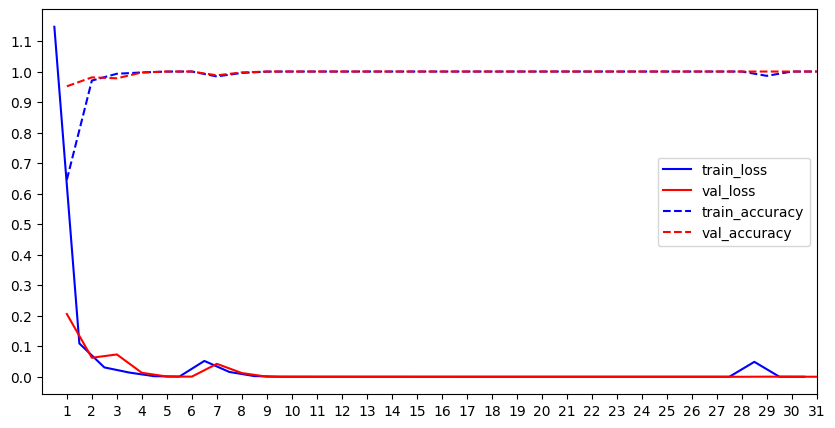

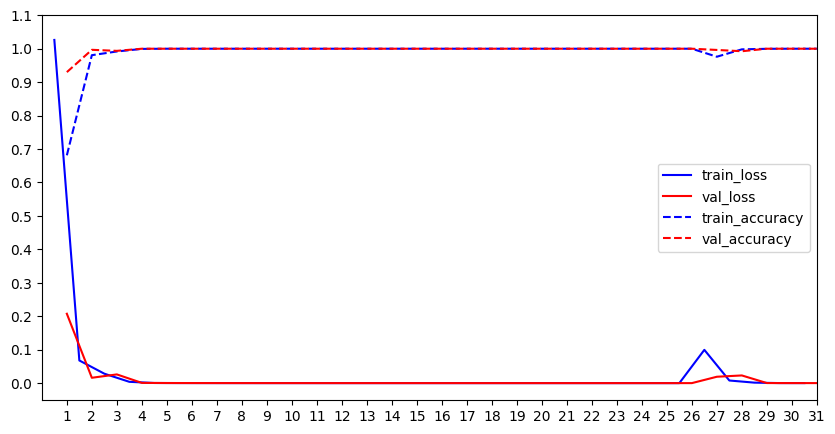

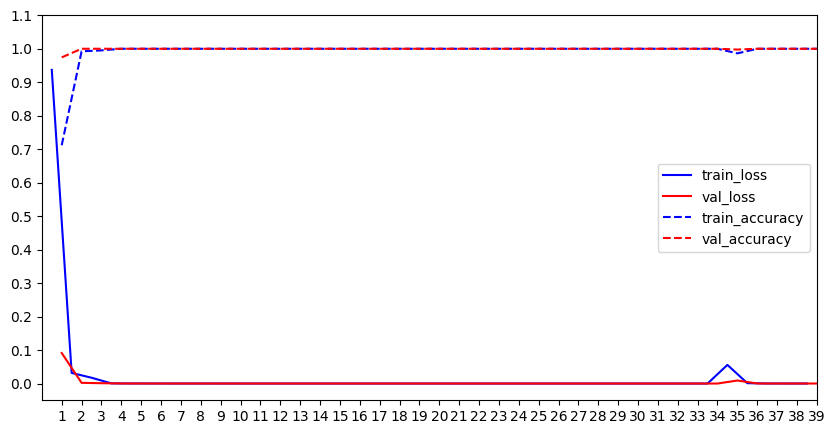

In [52]:
get_train_val_plots(h_2_1, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_2, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_3, yticks=np.arange(0, 1.2, 0.1))

Choosing model 3

---
### Filter Size
Checking with filter size 3*3

In [53]:
# Models
# 'models/experiment-fiters-1'

# History objects
# 'models/experiment-filters-1-history'

save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-fiters-1', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(24, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(48, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(96, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
with open(f'models/experiment-filters-1-history', 'wb') as history_file:
    pickle.dump(history.history, history_file)

Epoch 1/50
610/610 [==============================] - ETA: 0s - loss: 1.0434 - accuracy: 0.6792

610/610 [==============================] - 10s 8ms/step - loss: 1.0434 - accuracy: 0.6792 - val_loss: 0.2073 - val_accuracy: 0.9280
Epoch 2/50
606/610 [============================>.] - ETA: 0s - loss: 0.0821 - accuracy: 0.9766

610/610 [==============================] - 7s 12ms/step - loss: 0.0817 - accuracy: 0.9767 - val_loss: 0.0508 - val_accuracy: 0.9877
Epoch 3/50
609/610 [============================>.] - ETA: 0s - loss: 0.0225 - accuracy: 0.9946

610/610 [==============================] - 6s 10ms/step - loss: 0.0224 - accuracy: 0.9946 - val_loss: 0.0167 - val_accuracy: 0.9965
Epoch 4/50
610/610 [==============================] - 3s 6ms/step - loss: 0.0097 - accuracy: 0.9983 - val_loss: 0.1520 - val_accuracy: 0.9546
Epoch 5/50
610/610 [==============================] - 5s 8ms/step - loss: 0.0271 - accuracy: 0.9925 - val_loss: 0.0751 - val_accuracy: 0.9781
Epoch 6/50
605/610 [============================>.] - ETA: 0s - loss: 0.0089 - accuracy: 0.9976

610/610 [==============================] - 4s 7ms/step - loss: 0.0088 - accuracy: 0.9976 - val_loss: 6.2567e-04 - val_accuracy: 0.9999
Epoch 7/50
608/610 [============================>.] - ETA: 0s - loss: 3.3952e-04 - accuracy: 1.0000

610/610 [==============================] - 5s 9ms/step - loss: 3.4045e-04 - accuracy: 1.0000 - val_loss: 3.1284e-04 - val_accuracy: 1.0000
Epoch 8/50
604/610 [============================>.] - ETA: 0s - loss: 1.6191e-04 - accuracy: 1.0000

610/610 [==============================] - 8s 13ms/step - loss: 1.6190e-04 - accuracy: 1.0000 - val_loss: 1.9079e-04 - val_accuracy: 1.0000
Epoch 9/50
603/610 [============================>.] - ETA: 0s - loss: 1.0205e-04 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 1.0239e-04 - accuracy: 1.0000 - val_loss: 1.4489e-04 - val_accuracy: 1.0000
Epoch 10/50
610/610 [==============================] - 5s 8ms/step - loss: 7.3330e-05 - accuracy: 1.0000 - val_loss: 2.3311e-04 - val_accuracy: 1.0000
Epoch 11/50
607/610 [============================>.] - ETA: 0s - loss: 5.7868e-05 - accuracy: 1.0000

610/610 [==============================] - 5s 8ms/step - loss: 5.7794e-05 - accuracy: 1.0000 - val_loss: 1.0347e-04 - val_accuracy: 1.0000
Epoch 12/50
604/610 [============================>.] - ETA: 0s - loss: 4.0294e-05 - accuracy: 1.0000

610/610 [==============================] - 6s 10ms/step - loss: 4.0316e-05 - accuracy: 1.0000 - val_loss: 7.5789e-05 - val_accuracy: 1.0000
Epoch 13/50
604/610 [============================>.] - ETA: 0s - loss: 3.1745e-05 - accuracy: 1.0000

610/610 [==============================] - 7s 12ms/step - loss: 3.1635e-05 - accuracy: 1.0000 - val_loss: 7.1437e-05 - val_accuracy: 1.0000
Epoch 14/50
609/610 [============================>.] - ETA: 0s - loss: 2.3899e-05 - accuracy: 1.0000

610/610 [==============================] - 8s 12ms/step - loss: 2.3887e-05 - accuracy: 1.0000 - val_loss: 7.1227e-05 - val_accuracy: 1.0000
Epoch 15/50
603/610 [============================>.] - ETA: 0s - loss: 1.6014e-05 - accuracy: 1.0000

610/610 [==============================] - 7s 11ms/step - loss: 1.5912e-05 - accuracy: 1.0000 - val_loss: 6.9183e-05 - val_accuracy: 1.0000
Epoch 16/50
610/610 [==============================] - 5s 8ms/step - loss: 1.1598e-05 - accuracy: 1.0000 - val_loss: 1.0370e-04 - val_accuracy: 1.0000
Epoch 17/50
610/610 [==============================] - 6s 10ms/step - loss: 0.0114 - accuracy: 0.9978 - val_loss: 0.8081 - val_accuracy: 0.7867
Epoch 18/50
610/610 [==============================] - 5s 9ms/step - loss: 0.0316 - accuracy: 0.9915 - val_loss: 5.6648e-04 - val_accuracy: 0.9999
Epoch 19/50
610/610 [==============================] - 4s 7ms/step - loss: 2.2093e-04 - accuracy: 1.0000 - val_loss: 2.6855e-04 - val_accuracy: 1.0000
Epoch 20/50
610/610 [==============================] - 4s 7ms/step - loss: 1.2432e-04 - accuracy: 1.0000 - val_loss: 2.2619e-04 - val_accuracy: 1.0000


In [54]:
model = keras.models.load_model('models/experiment-fiters-1/')
model.evaluate(X_valid, y_valid)

249/249 [==============================] - 1s 5ms/step - loss: 6.9183e-05 - accuracy: 1.0000


[6.918302096892148e-05, 1.0]

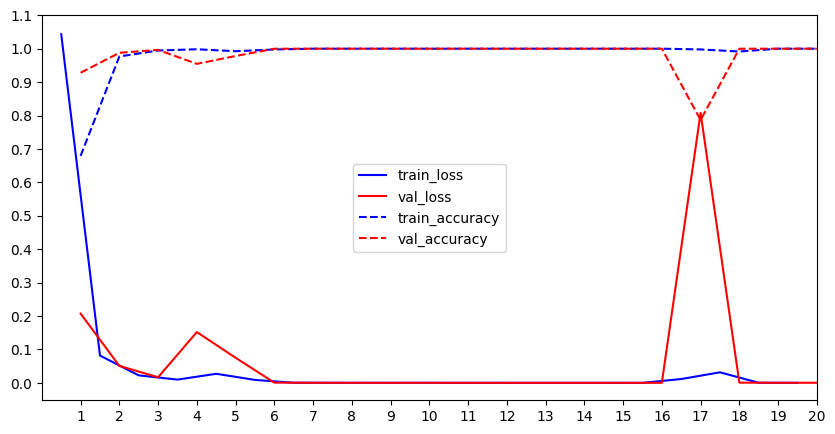

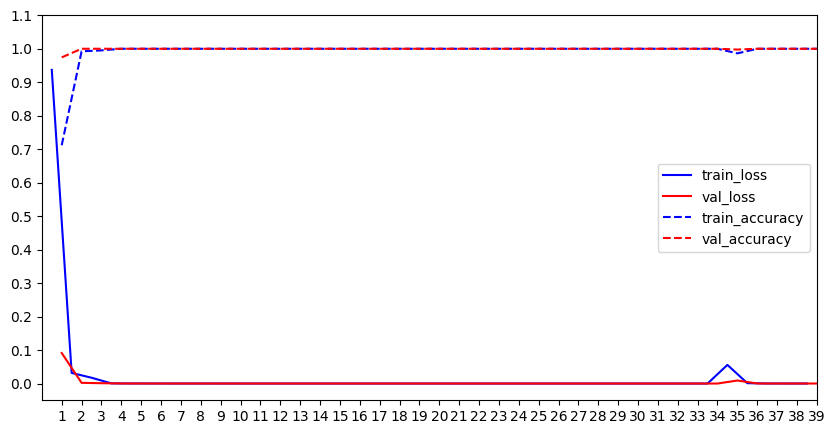

In [55]:
h_2_3 = np.load('models/experiment-fmaps-3-history', allow_pickle=True)
h = np.load('models/experiment-filters-1-history', allow_pickle=True)
get_train_val_plots(h, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_3, yticks=np.arange(0, 1.2, 0.1))

### Filter size 5x5 gives better results compared to 3x3

---
### Dropout

In [57]:
# Models
# 'models/experiment-dropout-0'
# 'models/experiment-dropout-1'
# 'models/experiment-dropout-2'

# History objects
# 'models/experiment-dropout-0-history'
# 'models/experiment-dropout-1-history'
# 'models/experiment-dropout-2-history'

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

dropout_rates = [0.3, 0.4, 0.5]

for index, i in enumerate(dropout_rates):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(24, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(48, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(96, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Dense(24, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-dropout-{index}', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-dropout-{index}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)


Epoch 1/50
601/610 [============================>.] - ETA: 0s - loss: 1.9096 - accuracy: 0.4034

610/610 [==============================] - 9s 9ms/step - loss: 1.8923 - accuracy: 0.4083 - val_loss: 0.3157 - val_accuracy: 0.9212
Epoch 2/50
609/610 [============================>.] - ETA: 0s - loss: 0.3625 - accuracy: 0.8753

610/610 [==============================] - 5s 9ms/step - loss: 0.3624 - accuracy: 0.8753 - val_loss: 0.0541 - val_accuracy: 0.9883
Epoch 3/50
601/610 [============================>.] - ETA: 0s - loss: 0.1627 - accuracy: 0.9432

610/610 [==============================] - 6s 11ms/step - loss: 0.1623 - accuracy: 0.9433 - val_loss: 0.0120 - val_accuracy: 0.9982
Epoch 4/50
607/610 [============================>.] - ETA: 0s - loss: 0.1020 - accuracy: 0.9671

610/610 [==============================] - 5s 8ms/step - loss: 0.1020 - accuracy: 0.9670 - val_loss: 0.0074 - val_accuracy: 0.9997
Epoch 5/50
608/610 [============================>.] - ETA: 0s - loss: 0.0781 - accuracy: 0.9731

610/610 [==============================] - 6s 10ms/step - loss: 0.0780 - accuracy: 0.9731 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 6/50
602/610 [============================>.] - ETA: 0s - loss: 0.0613 - accuracy: 0.9794

610/610 [==============================] - 5s 8ms/step - loss: 0.0616 - accuracy: 0.9793 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 7/50
607/610 [============================>.] - ETA: 0s - loss: 0.0548 - accuracy: 0.9823

610/610 [==============================] - 6s 11ms/step - loss: 0.0546 - accuracy: 0.9824 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 8/50
601/610 [============================>.] - ETA: 0s - loss: 0.0495 - accuracy: 0.9841

610/610 [==============================] - 6s 10ms/step - loss: 0.0495 - accuracy: 0.9841 - val_loss: 6.7418e-04 - val_accuracy: 1.0000
Epoch 9/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0416 - accuracy: 0.9870 - val_loss: 6.7498e-04 - val_accuracy: 1.0000
Epoch 10/50
610/610 [==============================] - 5s 8ms/step - loss: 0.0401 - accuracy: 0.9866 - val_loss: 6.8121e-04 - val_accuracy: 0.9999
Epoch 11/50
605/610 [============================>.] - ETA: 0s - loss: 0.0381 - accuracy: 0.9880

610/610 [==============================] - 5s 9ms/step - loss: 0.0381 - accuracy: 0.9881 - val_loss: 1.8939e-04 - val_accuracy: 1.0000
Epoch 12/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0356 - accuracy: 0.9887 - val_loss: 5.4449e-04 - val_accuracy: 1.0000
Epoch 13/50
610/610 [==============================] - 5s 9ms/step - loss: 0.0441 - accuracy: 0.9859 - val_loss: 3.1835e-04 - val_accuracy: 0.9999
Epoch 14/50
610/610 [==============================] - 5s 7ms/step - loss: 0.0348 - accuracy: 0.9887 - val_loss: 4.0289e-04 - val_accuracy: 1.0000
Epoch 15/50
604/610 [============================>.] - ETA: 0s - loss: 0.0369 - accuracy: 0.9884

610/610 [==============================] - 5s 8ms/step - loss: 0.0370 - accuracy: 0.9884 - val_loss: 9.1617e-05 - val_accuracy: 1.0000
Epoch 16/50
601/610 [============================>.] - ETA: 0s - loss: 0.0288 - accuracy: 0.9910

610/610 [==============================] - 6s 10ms/step - loss: 0.0289 - accuracy: 0.9909 - val_loss: 2.4903e-05 - val_accuracy: 1.0000
Epoch 17/50
608/610 [============================>.] - ETA: 0s - loss: 0.0331 - accuracy: 0.9903

610/610 [==============================] - 5s 8ms/step - loss: 0.0330 - accuracy: 0.9903 - val_loss: 1.4930e-05 - val_accuracy: 1.0000
Epoch 18/50
608/610 [============================>.] - ETA: 0s - loss: 0.0351 - accuracy: 0.9896

610/610 [==============================] - 7s 11ms/step - loss: 0.0351 - accuracy: 0.9896 - val_loss: 1.1112e-05 - val_accuracy: 1.0000
Epoch 19/50
608/610 [============================>.] - ETA: 0s - loss: 0.0291 - accuracy: 0.9918

610/610 [==============================] - 5s 9ms/step - loss: 0.0292 - accuracy: 0.9918 - val_loss: 1.0566e-05 - val_accuracy: 1.0000
Epoch 20/50
602/610 [============================>.] - ETA: 0s - loss: 0.0316 - accuracy: 0.9898

610/610 [==============================] - 6s 9ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 9.5261e-06 - val_accuracy: 1.0000
Epoch 21/50
610/610 [==============================] - 4s 7ms/step - loss: 0.0260 - accuracy: 0.9919 - val_loss: 1.5593e-04 - val_accuracy: 1.0000
Epoch 22/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0348 - accuracy: 0.9900 - val_loss: 2.2604e-05 - val_accuracy: 1.0000
Epoch 23/50
610/610 [==============================] - 4s 7ms/step - loss: 0.0258 - accuracy: 0.9924 - val_loss: 2.9930e-04 - val_accuracy: 1.0000
Epoch 24/50
610/610 [==============================] - 5s 8ms/step - loss: 0.0210 - accuracy: 0.9934 - val_loss: 1.5925e-05 - val_accuracy: 1.0000
Epoch 25/50
605/610 [============================>.] - ETA: 0s - loss: 0.0296 - accuracy: 0.9909

610/610 [==============================] - 6s 9ms/step - loss: 0.0297 - accuracy: 0.9909 - val_loss: 6.2620e-06 - val_accuracy: 1.0000
Epoch 26/50
610/610 [==============================] - 4s 7ms/step - loss: 0.0312 - accuracy: 0.9913 - val_loss: 3.0337e-05 - val_accuracy: 1.0000
Epoch 27/50
610/610 [==============================] - 5s 7ms/step - loss: 0.0220 - accuracy: 0.9930 - val_loss: 2.7143e-04 - val_accuracy: 1.0000
Epoch 28/50
607/610 [============================>.] - ETA: 0s - loss: 0.0262 - accuracy: 0.9921

610/610 [==============================] - 5s 8ms/step - loss: 0.0261 - accuracy: 0.9922 - val_loss: 1.0480e-06 - val_accuracy: 1.0000
Epoch 29/50
610/610 [==============================] - 4s 7ms/step - loss: 0.0401 - accuracy: 0.9894 - val_loss: 4.2349e-06 - val_accuracy: 1.0000
Epoch 30/50
610/610 [==============================] - 6s 10ms/step - loss: 0.0178 - accuracy: 0.9948 - val_loss: 1.6094e-05 - val_accuracy: 1.0000
Epoch 31/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0257 - accuracy: 0.9928 - val_loss: 8.5256e-06 - val_accuracy: 1.0000
Epoch 32/50
610/610 [==============================] - 4s 7ms/step - loss: 0.0386 - accuracy: 0.9899 - val_loss: 5.6283e-06 - val_accuracy: 1.0000
Epoch 33/50
610/610 [==============================] - 5s 7ms/step - loss: 0.0279 - accuracy: 0.9929 - val_loss: 3.3757e-05 - val_accuracy: 1.0000
Epoch 1/50
600/610 [============================>.] - ETA: 0s - loss: 2.2355 - accuracy: 0.3043

610/610 [==============================] - 8s 9ms/step - loss: 2.2177 - accuracy: 0.3091 - val_loss: 0.6065 - val_accuracy: 0.8255
Epoch 2/50
610/610 [==============================] - ETA: 0s - loss: 0.6822 - accuracy: 0.7577

610/610 [==============================] - 6s 10ms/step - loss: 0.6822 - accuracy: 0.7577 - val_loss: 0.1380 - val_accuracy: 0.9712
Epoch 3/50
603/610 [============================>.] - ETA: 0s - loss: 0.3525 - accuracy: 0.8765

610/610 [==============================] - 6s 9ms/step - loss: 0.3520 - accuracy: 0.8766 - val_loss: 0.0507 - val_accuracy: 0.9921
Epoch 4/50
603/610 [============================>.] - ETA: 0s - loss: 0.2369 - accuracy: 0.9174

610/610 [==============================] - 6s 10ms/step - loss: 0.2362 - accuracy: 0.9176 - val_loss: 0.0184 - val_accuracy: 0.9967
Epoch 5/50
606/610 [============================>.] - ETA: 0s - loss: 0.1706 - accuracy: 0.9439

610/610 [==============================] - 5s 8ms/step - loss: 0.1705 - accuracy: 0.9440 - val_loss: 0.0088 - val_accuracy: 0.9995
Epoch 6/50
602/610 [============================>.] - ETA: 0s - loss: 0.1409 - accuracy: 0.9537

610/610 [==============================] - 6s 10ms/step - loss: 0.1412 - accuracy: 0.9536 - val_loss: 0.0042 - val_accuracy: 0.9999
Epoch 7/50
610/610 [==============================] - 4s 7ms/step - loss: 0.1161 - accuracy: 0.9624 - val_loss: 0.0043 - val_accuracy: 0.9999
Epoch 8/50
604/610 [============================>.] - ETA: 0s - loss: 0.1035 - accuracy: 0.9647

610/610 [==============================] - 5s 8ms/step - loss: 0.1033 - accuracy: 0.9647 - val_loss: 0.0026 - val_accuracy: 0.9995
Epoch 9/50
607/610 [============================>.] - ETA: 0s - loss: 0.0932 - accuracy: 0.9690

610/610 [==============================] - 6s 10ms/step - loss: 0.0930 - accuracy: 0.9690 - val_loss: 8.9430e-04 - val_accuracy: 1.0000
Epoch 10/50
607/610 [============================>.] - ETA: 0s - loss: 0.0905 - accuracy: 0.9692

610/610 [==============================] - 5s 9ms/step - loss: 0.0910 - accuracy: 0.9692 - val_loss: 5.3356e-04 - val_accuracy: 1.0000
Epoch 11/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0879 - accuracy: 0.9709 - val_loss: 6.2377e-04 - val_accuracy: 1.0000
Epoch 12/50
608/610 [============================>.] - ETA: 0s - loss: 0.0738 - accuracy: 0.9774

610/610 [==============================] - 7s 11ms/step - loss: 0.0738 - accuracy: 0.9773 - val_loss: 3.4854e-04 - val_accuracy: 1.0000
Epoch 13/50
607/610 [============================>.] - ETA: 0s - loss: 0.0748 - accuracy: 0.9762

610/610 [==============================] - 6s 9ms/step - loss: 0.0748 - accuracy: 0.9762 - val_loss: 1.7094e-04 - val_accuracy: 1.0000
Epoch 14/50
606/610 [============================>.] - ETA: 0s - loss: 0.0758 - accuracy: 0.9767

610/610 [==============================] - 7s 11ms/step - loss: 0.0765 - accuracy: 0.9767 - val_loss: 1.2218e-04 - val_accuracy: 1.0000
Epoch 15/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0698 - accuracy: 0.9772 - val_loss: 9.0297e-04 - val_accuracy: 0.9996
Epoch 16/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0655 - accuracy: 0.9792 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 17/50
608/610 [============================>.] - ETA: 0s - loss: 0.0712 - accuracy: 0.9777

610/610 [==============================] - 7s 11ms/step - loss: 0.0711 - accuracy: 0.9778 - val_loss: 1.0894e-04 - val_accuracy: 1.0000
Epoch 18/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0656 - accuracy: 0.9793 - val_loss: 2.5541e-04 - val_accuracy: 1.0000
Epoch 19/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0675 - accuracy: 0.9775 - val_loss: 2.5218e-04 - val_accuracy: 0.9999
Epoch 20/50
610/610 [==============================] - 5s 8ms/step - loss: 0.0535 - accuracy: 0.9843 - val_loss: 2.5735e-04 - val_accuracy: 1.0000
Epoch 21/50
605/610 [============================>.] - ETA: 0s - loss: 0.0628 - accuracy: 0.9813

610/610 [==============================] - 5s 8ms/step - loss: 0.0632 - accuracy: 0.9813 - val_loss: 7.1274e-05 - val_accuracy: 1.0000
Epoch 22/50
606/610 [============================>.] - ETA: 0s - loss: 0.0644 - accuracy: 0.9804

610/610 [==============================] - 5s 9ms/step - loss: 0.0642 - accuracy: 0.9804 - val_loss: 3.8272e-05 - val_accuracy: 1.0000
Epoch 23/50
609/610 [============================>.] - ETA: 0s - loss: 0.0618 - accuracy: 0.9806

610/610 [==============================] - 6s 10ms/step - loss: 0.0617 - accuracy: 0.9806 - val_loss: 2.8117e-05 - val_accuracy: 1.0000
Epoch 24/50
610/610 [==============================] - 4s 7ms/step - loss: 0.0589 - accuracy: 0.9827 - val_loss: 3.9317e-05 - val_accuracy: 1.0000
Epoch 25/50
607/610 [============================>.] - ETA: 0s - loss: 0.0627 - accuracy: 0.9819

610/610 [==============================] - 6s 10ms/step - loss: 0.0626 - accuracy: 0.9819 - val_loss: 2.0325e-05 - val_accuracy: 1.0000
Epoch 26/50
605/610 [============================>.] - ETA: 0s - loss: 0.0505 - accuracy: 0.9839

610/610 [==============================] - 6s 11ms/step - loss: 0.0505 - accuracy: 0.9839 - val_loss: 1.6566e-05 - val_accuracy: 1.0000
Epoch 27/50
610/610 [==============================] - 6s 10ms/step - loss: 0.0481 - accuracy: 0.9855 - val_loss: 9.0079e-05 - val_accuracy: 1.0000
Epoch 28/50
610/610 [==============================] - 6s 9ms/step - loss: 0.0609 - accuracy: 0.9820 - val_loss: 3.9832e-04 - val_accuracy: 1.0000
Epoch 29/50
610/610 [==============================] - 4s 7ms/step - loss: 0.0514 - accuracy: 0.9850 - val_loss: 2.5462e-05 - val_accuracy: 1.0000
Epoch 30/50
610/610 [==============================] - 7s 11ms/step - loss: 0.0557 - accuracy: 0.9840 - val_loss: 1.4082e-04 - val_accuracy: 1.0000
Epoch 31/50
605/610 [============================>.] - ETA: 0s - loss: 0.0571 - accuracy: 0.9838

610/610 [==============================] - 5s 8ms/step - loss: 0.0573 - accuracy: 0.9837 - val_loss: 4.6412e-06 - val_accuracy: 1.0000
Epoch 32/50
610/610 [==============================] - 6s 10ms/step - loss: 0.0529 - accuracy: 0.9835 - val_loss: 2.0390e-05 - val_accuracy: 1.0000
Epoch 33/50
606/610 [============================>.] - ETA: 0s - loss: 0.0633 - accuracy: 0.9823

610/610 [==============================] - 7s 12ms/step - loss: 0.0630 - accuracy: 0.9823 - val_loss: 1.8734e-06 - val_accuracy: 1.0000
Epoch 34/50
610/610 [==============================] - 4s 7ms/step - loss: 0.0613 - accuracy: 0.9838 - val_loss: 2.1395e-05 - val_accuracy: 1.0000
Epoch 35/50
610/610 [==============================] - 4s 7ms/step - loss: 0.0514 - accuracy: 0.9858 - val_loss: 1.0345e-05 - val_accuracy: 1.0000
Epoch 36/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0518 - accuracy: 0.9866 - val_loss: 4.0697e-06 - val_accuracy: 1.0000
Epoch 37/50
610/610 [==============================] - 5s 8ms/step - loss: 0.0579 - accuracy: 0.9838 - val_loss: 2.0405e-05 - val_accuracy: 1.0000
Epoch 38/50
610/610 [==============================] - 7s 11ms/step - loss: 0.0555 - accuracy: 0.9846 - val_loss: 4.2018e-05 - val_accuracy: 1.0000
Epoch 1/50
605/610 [============================>.] - ETA: 0s - loss: 2.7999 - accuracy: 0.1430

610/610 [==============================] - 12s 16ms/step - loss: 2.7925 - accuracy: 0.1452 - val_loss: 1.4093 - val_accuracy: 0.6097
Epoch 2/50
610/610 [==============================] - ETA: 0s - loss: 1.3130 - accuracy: 0.5556

610/610 [==============================] - 9s 14ms/step - loss: 1.3130 - accuracy: 0.5556 - val_loss: 0.5218 - val_accuracy: 0.8802
Epoch 3/50
609/610 [============================>.] - ETA: 0s - loss: 0.8004 - accuracy: 0.7185

610/610 [==============================] - 7s 11ms/step - loss: 0.8002 - accuracy: 0.7185 - val_loss: 0.2569 - val_accuracy: 0.9550
Epoch 4/50
609/610 [============================>.] - ETA: 0s - loss: 0.5951 - accuracy: 0.7954

610/610 [==============================] - 6s 11ms/step - loss: 0.5949 - accuracy: 0.7955 - val_loss: 0.1572 - val_accuracy: 0.9701
Epoch 5/50
606/610 [============================>.] - ETA: 0s - loss: 0.4632 - accuracy: 0.8350

610/610 [==============================] - 5s 9ms/step - loss: 0.4632 - accuracy: 0.8348 - val_loss: 0.0879 - val_accuracy: 0.9918
Epoch 6/50
607/610 [============================>.] - ETA: 0s - loss: 0.3896 - accuracy: 0.8667

610/610 [==============================] - 6s 10ms/step - loss: 0.3888 - accuracy: 0.8670 - val_loss: 0.0647 - val_accuracy: 0.9923
Epoch 7/50
608/610 [============================>.] - ETA: 0s - loss: 0.3429 - accuracy: 0.8841

610/610 [==============================] - 5s 8ms/step - loss: 0.3431 - accuracy: 0.8842 - val_loss: 0.0542 - val_accuracy: 0.9908
Epoch 8/50
609/610 [============================>.] - ETA: 0s - loss: 0.2972 - accuracy: 0.8965

610/610 [==============================] - 10s 16ms/step - loss: 0.2971 - accuracy: 0.8965 - val_loss: 0.0283 - val_accuracy: 0.9981
Epoch 9/50
610/610 [==============================] - ETA: 0s - loss: 0.2631 - accuracy: 0.9104

610/610 [==============================] - 9s 14ms/step - loss: 0.2631 - accuracy: 0.9104 - val_loss: 0.0179 - val_accuracy: 0.9989
Epoch 10/50
605/610 [============================>.] - ETA: 0s - loss: 0.2557 - accuracy: 0.9166

610/610 [==============================] - 7s 11ms/step - loss: 0.2559 - accuracy: 0.9166 - val_loss: 0.0136 - val_accuracy: 0.9990
Epoch 11/50
610/610 [==============================] - 4s 6ms/step - loss: 0.2388 - accuracy: 0.9229 - val_loss: 0.0137 - val_accuracy: 0.9989
Epoch 12/50
604/610 [============================>.] - ETA: 0s - loss: 0.2251 - accuracy: 0.9257

610/610 [==============================] - 7s 11ms/step - loss: 0.2250 - accuracy: 0.9258 - val_loss: 0.0080 - val_accuracy: 0.9999
Epoch 13/50
600/610 [============================>.] - ETA: 0s - loss: 0.2100 - accuracy: 0.9307

610/610 [==============================] - 5s 8ms/step - loss: 0.2095 - accuracy: 0.9308 - val_loss: 0.0052 - val_accuracy: 0.9995
Epoch 14/50
610/610 [==============================] - 4s 6ms/step - loss: 0.2014 - accuracy: 0.9333 - val_loss: 0.0059 - val_accuracy: 0.9991
Epoch 15/50
609/610 [============================>.] - ETA: 0s - loss: 0.1900 - accuracy: 0.9399

610/610 [==============================] - 6s 11ms/step - loss: 0.1901 - accuracy: 0.9399 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 16/50
600/610 [============================>.] - ETA: 0s - loss: 0.1863 - accuracy: 0.9392

610/610 [==============================] - 5s 8ms/step - loss: 0.1869 - accuracy: 0.9389 - val_loss: 0.0048 - val_accuracy: 0.9997
Epoch 17/50
607/610 [============================>.] - ETA: 0s - loss: 0.1846 - accuracy: 0.9386

610/610 [==============================] - 6s 10ms/step - loss: 0.1842 - accuracy: 0.9387 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 18/50
610/610 [==============================] - 4s 6ms/step - loss: 0.1671 - accuracy: 0.9453 - val_loss: 0.0026 - val_accuracy: 0.9996
Epoch 19/50
607/610 [============================>.] - ETA: 0s - loss: 0.1605 - accuracy: 0.9474

610/610 [==============================] - 5s 9ms/step - loss: 0.1605 - accuracy: 0.9472 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 20/50
606/610 [============================>.] - ETA: 0s - loss: 0.1683 - accuracy: 0.9473

610/610 [==============================] - 8s 13ms/step - loss: 0.1681 - accuracy: 0.9473 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 21/50
609/610 [============================>.] - ETA: 0s - loss: 0.1600 - accuracy: 0.9479

610/610 [==============================] - 8s 12ms/step - loss: 0.1599 - accuracy: 0.9479 - val_loss: 9.9056e-04 - val_accuracy: 1.0000
Epoch 22/50
610/610 [==============================] - 5s 8ms/step - loss: 0.1584 - accuracy: 0.9508 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 23/50
610/610 [==============================] - 5s 8ms/step - loss: 0.1536 - accuracy: 0.9506 - val_loss: 0.0018 - val_accuracy: 0.9999
Epoch 24/50
610/610 [==============================] - 5s 8ms/step - loss: 0.1597 - accuracy: 0.9509 - val_loss: 0.0014 - val_accuracy: 0.9999
Epoch 25/50
610/610 [==============================] - 4s 7ms/step - loss: 0.1467 - accuracy: 0.9547 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 26/50
601/610 [============================>.] - ETA: 0s - loss: 0.1504 - accuracy: 0.9520

610/610 [==============================] - 5s 8ms/step - loss: 0.1496 - accuracy: 0.9523 - val_loss: 5.7153e-04 - val_accuracy: 1.0000
Epoch 27/50
610/610 [==============================] - 4s 6ms/step - loss: 0.1425 - accuracy: 0.9561 - val_loss: 8.6026e-04 - val_accuracy: 1.0000
Epoch 28/50
610/610 [==============================] - 5s 9ms/step - loss: 0.1528 - accuracy: 0.9552 - val_loss: 9.4542e-04 - val_accuracy: 0.9999
Epoch 29/50
600/610 [============================>.] - ETA: 0s - loss: 0.1331 - accuracy: 0.9585

610/610 [==============================] - 5s 8ms/step - loss: 0.1336 - accuracy: 0.9584 - val_loss: 3.9795e-04 - val_accuracy: 1.0000
Epoch 30/50
605/610 [============================>.] - ETA: 0s - loss: 0.1488 - accuracy: 0.9533

610/610 [==============================] - 6s 11ms/step - loss: 0.1485 - accuracy: 0.9534 - val_loss: 2.4548e-04 - val_accuracy: 1.0000
Epoch 31/50
610/610 [==============================] - 4s 7ms/step - loss: 0.1350 - accuracy: 0.9582 - val_loss: 7.1924e-04 - val_accuracy: 1.0000
Epoch 32/50
610/610 [==============================] - 4s 6ms/step - loss: 0.1460 - accuracy: 0.9552 - val_loss: 7.4756e-04 - val_accuracy: 1.0000
Epoch 33/50
610/610 [==============================] - 5s 8ms/step - loss: 0.1350 - accuracy: 0.9607 - val_loss: 3.5367e-04 - val_accuracy: 1.0000
Epoch 34/50
610/610 [==============================] - 4s 7ms/step - loss: 0.1260 - accuracy: 0.9595 - val_loss: 3.1555e-04 - val_accuracy: 1.0000
Epoch 35/50
610/610 [==============================] - 4s 6ms/step - loss: 0.1401 - accuracy: 0.9586 - val_loss: 6.0412e-04 - val_accuracy: 0.9999


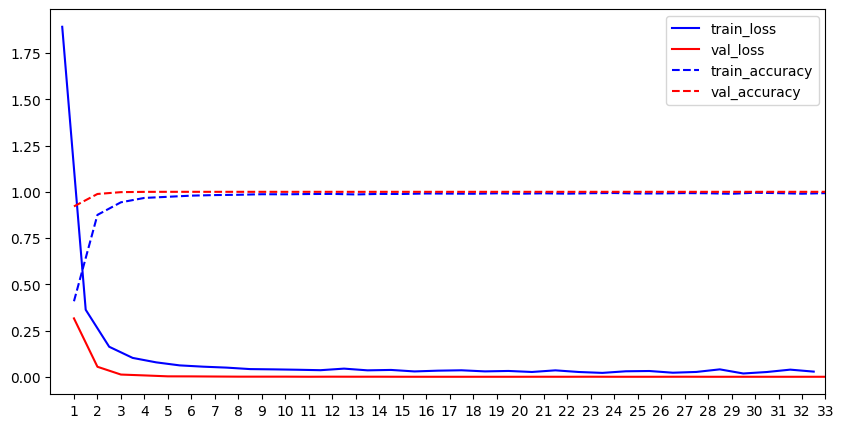

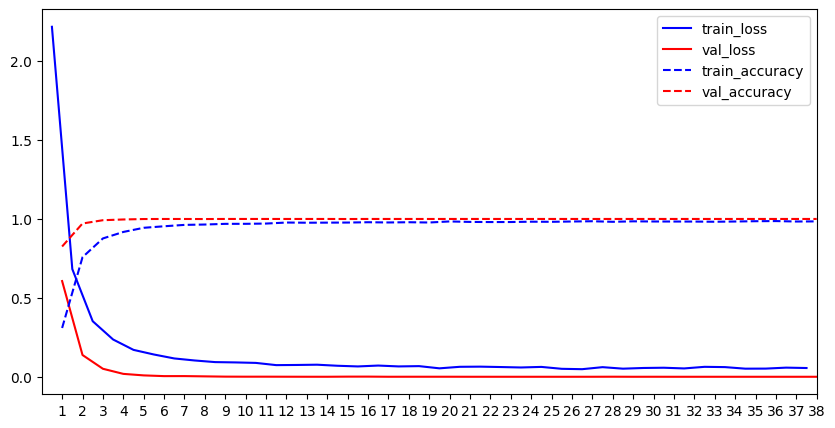

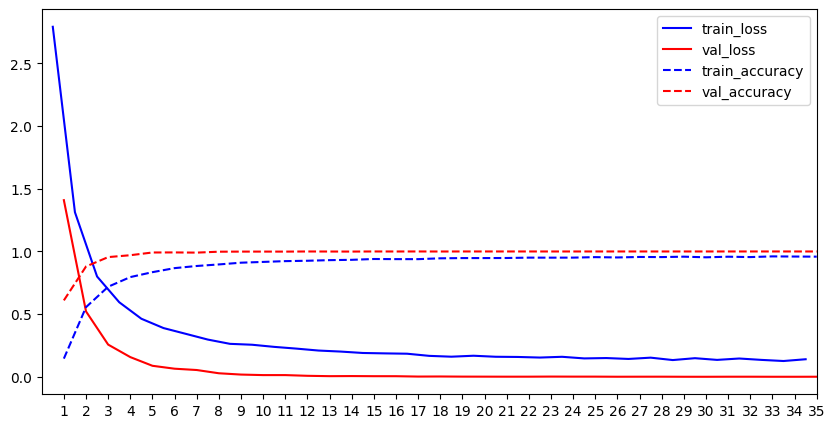

In [58]:
h_0 = np.load('models/experiment-dropout-0-history', allow_pickle=True)
h_1 = np.load('models/experiment-dropout-1-history', allow_pickle=True)
h_2 = np.load('models/experiment-dropout-2-history', allow_pickle=True)

get_train_val_plots(h_0)
get_train_val_plots(h_1)
get_train_val_plots(h_2)

Selecting Model 1 (h_0)

---
### Data Augmentation
Adding random rotation, random translation and random zoom.

In [59]:
data_augmentation = keras.models.Sequential()
data_augmentation.add(keras.layers.RandomRotation(0.1, fill_mode='nearest', input_shape=(28, 28, 1)))
data_augmentation.add(keras.layers.RandomZoom((0.15, 0.2), fill_mode='nearest'))
data_augmentation.add(keras.layers.RandomTranslation(0.1, 0.1, fill_mode='nearest'))

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(24, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Conv2D(48, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Conv2D(96, (5, 5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(24, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
save_best_cb = keras.callbacks.ModelCheckpoint('models/experiment-dropout-augmentation-0', save_best_only=True)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
with open('models/experiment-dropout-augmentation-0-history', 'wb') as history_file:
    pickle.dump(history.history, history_file)

Epoch 1/50
607/610 [============================>.] - ETA: 0s - loss: 2.0909 - accuracy: 0.3479

610/610 [==============================] - 8s 9ms/step - loss: 2.0852 - accuracy: 0.3497 - val_loss: 0.4609 - val_accuracy: 0.8856
Epoch 2/50
607/610 [============================>.] - ETA: 0s - loss: 0.4874 - accuracy: 0.8290

610/610 [==============================] - 5s 8ms/step - loss: 0.4870 - accuracy: 0.8291 - val_loss: 0.0773 - val_accuracy: 0.9853
Epoch 3/50
608/610 [============================>.] - ETA: 0s - loss: 0.2110 - accuracy: 0.9272

610/610 [==============================] - 6s 10ms/step - loss: 0.2108 - accuracy: 0.9273 - val_loss: 0.0243 - val_accuracy: 0.9953
Epoch 4/50
600/610 [============================>.] - ETA: 0s - loss: 0.1331 - accuracy: 0.9554

610/610 [==============================] - 5s 9ms/step - loss: 0.1327 - accuracy: 0.9555 - val_loss: 0.0076 - val_accuracy: 0.9997
Epoch 5/50
600/610 [============================>.] - ETA: 0s - loss: 0.0934 - accuracy: 0.9692

610/610 [==============================] - 6s 9ms/step - loss: 0.0928 - accuracy: 0.9694 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 6/50
605/610 [============================>.] - ETA: 0s - loss: 0.0786 - accuracy: 0.9741

610/610 [==============================] - 9s 15ms/step - loss: 0.0786 - accuracy: 0.9742 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/50
610/610 [==============================] - 8s 13ms/step - loss: 0.0643 - accuracy: 0.9796 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 8/50
609/610 [============================>.] - ETA: 0s - loss: 0.0573 - accuracy: 0.9802

610/610 [==============================] - 8s 12ms/step - loss: 0.0573 - accuracy: 0.9802 - val_loss: 2.8966e-04 - val_accuracy: 1.0000
Epoch 9/50
610/610 [==============================] - 6s 11ms/step - loss: 0.0498 - accuracy: 0.9836 - val_loss: 4.3008e-04 - val_accuracy: 1.0000
Epoch 10/50
606/610 [============================>.] - ETA: 0s - loss: 0.0452 - accuracy: 0.9857

610/610 [==============================] - 5s 8ms/step - loss: 0.0452 - accuracy: 0.9857 - val_loss: 2.3475e-04 - val_accuracy: 1.0000
Epoch 11/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0504 - accuracy: 0.9838 - val_loss: 3.7609e-04 - val_accuracy: 1.0000
Epoch 12/50
610/610 [==============================] - 5s 8ms/step - loss: 0.0426 - accuracy: 0.9853 - val_loss: 5.4065e-04 - val_accuracy: 1.0000
Epoch 13/50
605/610 [============================>.] - ETA: 0s - loss: 0.0423 - accuracy: 0.9862

610/610 [==============================] - 5s 9ms/step - loss: 0.0421 - accuracy: 0.9863 - val_loss: 6.1125e-05 - val_accuracy: 1.0000
Epoch 14/50
610/610 [==============================] - 4s 7ms/step - loss: 0.0382 - accuracy: 0.9877 - val_loss: 1.7000e-04 - val_accuracy: 1.0000
Epoch 15/50
610/610 [==============================] - 5s 8ms/step - loss: 0.0445 - accuracy: 0.9861 - val_loss: 1.1575e-04 - val_accuracy: 1.0000
Epoch 16/50
610/610 [==============================] - ETA: 0s - loss: 0.0365 - accuracy: 0.9888

610/610 [==============================] - 5s 8ms/step - loss: 0.0365 - accuracy: 0.9888 - val_loss: 2.3995e-05 - val_accuracy: 1.0000
Epoch 17/50
610/610 [==============================] - 4s 7ms/step - loss: 0.0345 - accuracy: 0.9897 - val_loss: 5.0566e-05 - val_accuracy: 1.0000
Epoch 18/50
610/610 [==============================] - 4s 7ms/step - loss: 0.0366 - accuracy: 0.9901 - val_loss: 4.5401e-04 - val_accuracy: 0.9999
Epoch 19/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0336 - accuracy: 0.9897 - val_loss: 4.5479e-05 - val_accuracy: 1.0000
Epoch 20/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0316 - accuracy: 0.9902 - val_loss: 6.5790e-05 - val_accuracy: 1.0000
Epoch 21/50
607/610 [============================>.] - ETA: 0s - loss: 0.0443 - accuracy: 0.9871

610/610 [==============================] - 6s 10ms/step - loss: 0.0441 - accuracy: 0.9871 - val_loss: 6.8718e-06 - val_accuracy: 1.0000
Epoch 22/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0355 - accuracy: 0.9898 - val_loss: 1.7500e-04 - val_accuracy: 1.0000
Epoch 23/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0372 - accuracy: 0.9887 - val_loss: 8.2419e-05 - val_accuracy: 1.0000
Epoch 24/50
610/610 [==============================] - 5s 8ms/step - loss: 0.0386 - accuracy: 0.9897 - val_loss: 1.0887e-05 - val_accuracy: 1.0000
Epoch 25/50
609/610 [============================>.] - ETA: 0s - loss: 0.0263 - accuracy: 0.9918

610/610 [==============================] - 7s 12ms/step - loss: 0.0263 - accuracy: 0.9918 - val_loss: 5.7461e-06 - val_accuracy: 1.0000
Epoch 26/50
610/610 [==============================] - 6s 11ms/step - loss: 0.0341 - accuracy: 0.9907 - val_loss: 1.1981e-05 - val_accuracy: 1.0000
Epoch 27/50
610/610 [==============================] - 4s 7ms/step - loss: 0.0370 - accuracy: 0.9902 - val_loss: 6.0802e-06 - val_accuracy: 1.0000
Epoch 28/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0329 - accuracy: 0.9906 - val_loss: 7.7312e-06 - val_accuracy: 1.0000
Epoch 29/50
610/610 [==============================] - 5s 8ms/step - loss: 0.0277 - accuracy: 0.9925 - val_loss: 9.8388e-06 - val_accuracy: 1.0000
Epoch 30/50
610/610 [==============================] - 4s 6ms/step - loss: 0.0323 - accuracy: 0.9908 - val_loss: 9.6738e-06 - val_accuracy: 1.0000


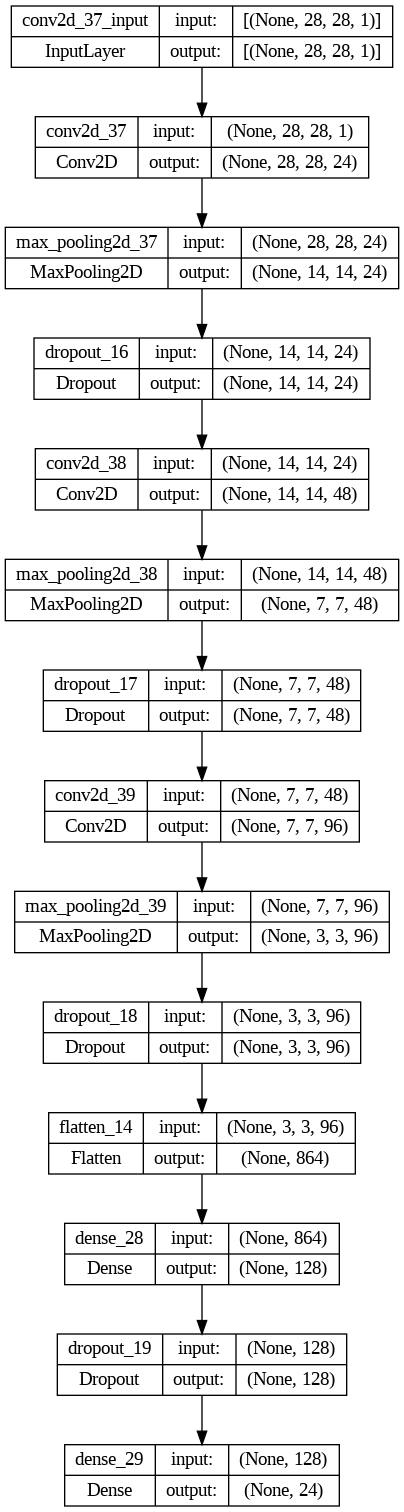

In [60]:
best_model = keras.models.load_model('models/experiment-dropout-augmentation-0')
plot_model(best_model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [61]:
test_df = pd.read_csv('sign_mnist_test.csv')
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

best_model = keras.models.load_model('models/experiment-dropout-augmentation-0')

evaluate_model(best_model, X_test, y_test, label_binarizer)

225/225 [==============================] - 1s 5ms/step - loss: 37.3575 - accuracy: 0.9757
Loss: 37.357 Accuracy: 0.976


In [62]:
test_df = pd.read_csv('sign_mnist_test.csv')
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

# Applying normalisation which is applied for X_train
X_test /= 255.0

In [63]:
best_model = keras.models.load_model('models/experiment-dropout-augmentation-0')

evaluate_model(best_model, X_test, y_test, label_binarizer)

225/225 [==============================] - 1s 3ms/step - loss: 0.1084 - accuracy: 0.9826
Loss: 0.108 Accuracy: 0.983


### Accuracy: 98.3


Other Hyperparameters that can be modified

    1. Deeper networks work well - Replacing the single convolution layer of filter size (5X5) with two successive consecutive convolution layers of filter size (3X3)
    
    2. Replacing the MaxPooling Layer with a convolution layer having a stride > 1
    
    3. Optimizers
    
    4. Learning rate of the optimizer



In [64]:
!zip -r models models/

  adding: models/ (stored 0%)
  adding: models/experiment-fmaps-3/ (stored 0%)
  adding: models/experiment-fmaps-3/fingerprint.pb (stored 0%)
  adding: models/experiment-fmaps-3/keras_metadata.pb (deflated 91%)
  adding: models/experiment-fmaps-3/saved_model.pb (deflated 88%)
  adding: models/experiment-fmaps-3/assets/ (stored 0%)
  adding: models/experiment-fmaps-3/variables/ (stored 0%)
  adding: models/experiment-fmaps-3/variables/variables.index (deflated 63%)
  adding: models/experiment-fmaps-3/variables/variables.data-00000-of-00001 (deflated 20%)
  adding: models/experiment-dropout-augmentation-0/ (stored 0%)
  adding: models/experiment-dropout-augmentation-0/fingerprint.pb (stored 0%)
  adding: models/experiment-dropout-augmentation-0/keras_metadata.pb (deflated 92%)
  adding: models/experiment-dropout-augmentation-0/saved_model.pb (deflated 89%)
  adding: models/experiment-dropout-augmentation-0/assets/ (stored 0%)
  adding: models/experiment-dropout-augmentation-0/variables/ 